# Prudential Life Insurance Assessment

### Variable Names and Descriptions
__Variable__ Description  
__Id__	A unique identifier associated with an application.  
__Product_Info_1-7__	A set of normalized variables relating to the product applied for  
__Ins_Age__	Normalized age of applicant  
__Ht__	Normalized height of applicant  
__Wt__	Normalized weight of applicant  
__BMI__	Normalized BMI of applicant  
__Employment_Info_1-6__	A set of normalized variables relating to the employment history of the applicant.  
__InsuredInfo_1-6__	A set of normalized variables providing information about the applicant.  
__Insurance_History_1-9__	A set of normalized variables relating to the insurance history of the applicant.  
__Family_Hist_1-5__	A set of normalized variables relating to the family history of the applicant.  
__Medical_History_1-41__	A set of normalized variables relating to the medical history of the applicant.  
__Medical_Keyword_1-48__	A set of dummy variables relating to the presence of/absence of a medical keyword being associated with the application.  
__Response__	This is the target variable, an ordinal variable relating to the final decision associated with an application  


### Categorical Variables
Product_Info_1, Product_Info_2, Product_Info_3, Product_Info_5, Product_Info_6, Product_Info_7, Employment_Info_2, Employment_Info_3, Employment_Info_5, InsuredInfo_1, InsuredInfo_2, InsuredInfo_3, InsuredInfo_4, InsuredInfo_5, InsuredInfo_6, InsuredInfo_7, Insurance_History_1, Insurance_History_2, Insurance_History_3, Insurance_History_4, Insurance_History_7, Insurance_History_8, Insurance_History_9, Family_Hist_1, Medical_History_2, Medical_History_3, Medical_History_4, Medical_History_5, Medical_History_6, Medical_History_7, Medical_History_8, Medical_History_9, Medical_History_10, Medical_History_11, Medical_History_12, Medical_History_13, Medical_History_14, Medical_History_16, Medical_History_17, Medical_History_18, Medical_History_19, Medical_History_20, Medical_History_21, Medical_History_22, Medical_History_23, Medical_History_25, Medical_History_26, Medical_History_27, Medical_History_28, Medical_History_29, Medical_History_30, Medical_History_31, Medical_History_33, Medical_History_34, Medical_History_35, Medical_History_36, Medical_History_37, Medical_History_38, Medical_History_39, Medical_History_40, Medical_History_41

### Continuous Variables
Product_Info_4, Ins_Age, Ht, Wt, BMI, Employment_Info_1, Employment_Info_4, Employment_Info_6, Insurance_History_5, Family_Hist_2, Family_Hist_3, Family_Hist_4, Family_Hist_5

### Discrete Variables
Medical_History_1, Medical_History_15, Medical_History_24, Medical_History_32

## 1. Read in the data, import the necessary stuff, look at the data

In [1]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
#import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as kNN
from sklearn.naive_bayes import GaussianNB
from sklearn import cross_validation
from sklearn import metrics

import xgboost as xgb

DATA_DIR = '/Users/patrickkennedy/Desktop'

In [9]:
df_train = pd.read_csv(DATA_DIR + '/Project DATA/train.csv')
df_test = pd.read_csv(DATA_DIR + '/Project DATA/test.csv')

df_train['Product_Info_2'].unique()
counts = df_train['Product_Info_2'].value_counts()

#do a comparison from counts here and the distribution of outcome variable



D3    14321
D4    10812
A8     6835
D1     6554
D2     6286
E1     2647
A1     2363
A6     2098
A2     1974
A7     1383
B2     1122
A3      977
A5      775
C3      306
C1      285
C4      219
A4      210
C2      160
B1       54
dtype: int64

In [17]:
df_train['Product_Info_2'] = pd.factorize(df_train['Product_Info_2'])[0]
df_train.fillna(-1, inplace=True)

In [75]:
df_corr = df_train.corr()

In [76]:
df_corr_sorted = df_corr.sort(columns='Response', ascending=False)
#print df_corr_sorted['Response']

response_corr = df_corr_sorted[abs(df_corr_sorted['Response']) > .02].index

In [77]:
response_corr = list(response_corr)


In [78]:
response_correlations = response_corr[1:]


In [79]:
print response_correlations

['Medical_History_23', 'Medical_History_4', 'Medical_History_39', 'Product_Info_4', 'Family_Hist_2', 'Medical_History_6', 'Family_Hist_4', 'Medical_History_13', 'Medical_History_40', 'InsuredInfo_6', 'Medical_History_33', 'Medical_History_27', 'InsuredInfo_1', 'Medical_History_1', 'Employment_Info_2', 'Medical_History_29', 'Medical_History_20', 'Medical_History_17', 'Family_Hist_1', 'Medical_History_9', 'Employment_Info_5', 'Medical_History_22', 'Medical_History_31', 'Employment_Info_1', 'Medical_History_34', 'Medical_History_11', 'Medical_History_14', 'Medical_History_37', 'Medical_History_7', 'InsuredInfo_4', 'Medical_History_3', 'Medical_Keyword_7', 'Medical_Keyword_14', 'Medical_Keyword_21', 'Product_Info_2', 'Medical_Keyword_30', 'Medical_Keyword_11', 'Medical_Keyword_28', 'Medical_History_24', 'Medical_History_10', 'Product_Info_6', 'Medical_Keyword_34', 'Medical_Keyword_13', 'Medical_History_19', 'Medical_Keyword_4', 'Medical_Keyword_33', 'Medical_Keyword_36', 'Medical_Keyword_1

In [15]:
df_train.describe()


,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,...,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,39507.211515,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,...,0.056954,0.010054,0.045536,0.010710,0.007528,0.013691,0.008488,0.019905,0.054496,5.636837
std,22815.883089,0.160191,5.072885,0.282562,0.083107,0.739103,0.291949,0.197190,0.074239,0.089037,...,0.231757,0.099764,0.208479,0.102937,0.086436,0.116207,0.091737,0.139676,0.226995,2.456833
min,2.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,19780.000000,1.000000,26.000000,0.076923,2.000000,3.000000,1.000000,0.238806,0.654545,0.225941,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,39487.000000,1.000000,26.000000,0.230769,2.000000,3.000000,1.000000,0.402985,0.709091,0.288703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,59211.000000,1.000000,26.000000,0.487179,2.000000,3.000000,1.000000,0.567164,0.763636,0.345188,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
max,79146.000000,2.000000,38.000000,1.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


In [19]:
categorical = ['Product_Info_1', 'Product_Info_2', 'Product_Info_3', 'Product_Info_5', 'Product_Info_6',
               'Product_Info_7', 'Employment_Info_2', 'Employment_Info_3', 'Employment_Info_5', 'InsuredInfo_1',
               'InsuredInfo_2', 'InsuredInfo_3', 'InsuredInfo_4', 'InsuredInfo_5', 'InsuredInfo_6', 'InsuredInfo_7',
               'Insurance_History_1', 'Insurance_History_2', 'Insurance_History_3', 'Insurance_History_4',
               'Insurance_History_7', 'Insurance_History_8', 'Insurance_History_9', 'Family_Hist_1', 'Medical_History_2',
               'Medical_History_3', 'Medical_History_4', 'Medical_History_5', 'Medical_History_6', 'Medical_History_7',
               'Medical_History_8', 'Medical_History_9', 'Medical_History_10', 'Medical_History_11', 'Medical_History_12',
               'Medical_History_13', 'Medical_History_14', 'Medical_History_16', 'Medical_History_17', 'Medical_History_18',
               'Medical_History_19', 'Medical_History_20', 'Medical_History_21', 'Medical_History_22', 'Medical_History_23',
               'Medical_History_25', 'Medical_History_26', 'Medical_History_27', 'Medical_History_28', 'Medical_History_29',
               'Medical_History_30', 'Medical_History_31', 'Medical_History_33', 'Medical_History_34', 'Medical_History_35',
               'Medical_History_36', 'Medical_History_37', 'Medical_History_38', 'Medical_History_39', 'Medical_History_40',
               'Medical_History_41']


continuous = ['Product_Info_4', 'Ins_Age', 'Ht', 'Wt', 'BMI', 'Employment_Info_1', 'Employment_Info_4', 'Employment_Info_6',
              'Insurance_History_5', 'Family_Hist_2', 'Family_Hist_3', 'Family_Hist_4', 'Family_Hist_5']

discrete = ['Medical_History_1', 'Medical_History_15', 'Medical_History_24', 'Medical_History_32']

features = df_train.columns
features.drop(categorical)
features.drop(continuous)
features.drop(discrete)
print features

#df_train[categorical].head()

Index([u'Id', u'Product_Info_1', u'Product_Info_2', u'Product_Info_3',
       u'Product_Info_4', u'Product_Info_5', u'Product_Info_6',
       u'Product_Info_7', u'Ins_Age', u'Ht', 
       ...
       u'Medical_Keyword_40', u'Medical_Keyword_41', u'Medical_Keyword_42',
       u'Medical_Keyword_43', u'Medical_Keyword_44', u'Medical_Keyword_45',
       u'Medical_Keyword_46', u'Medical_Keyword_47', u'Medical_Keyword_48',
       u'Response'],
      dtype='object', length=128)


In [283]:
19489/59381.0

0.3282026237348647

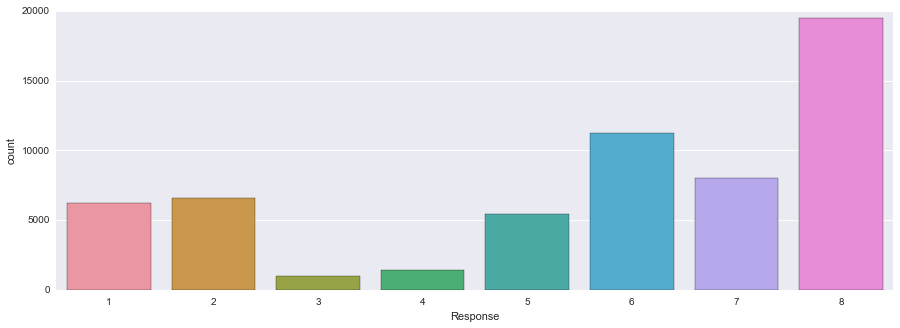

In [56]:
# response

fig, (axis1) = plt.subplots(1,1,figsize=(15,5))

sns.countplot(x=df_train["Response"], order=[1,2,3,4,5,6,7,8], ax=axis1)

In [57]:
# There are some columns with non-numerical values(i.e. dtype='object'),
# So, We will create a corresponding unique numerical value for each non-numerical value in a column of training and testing set.

from sklearn import preprocessing

for f in df_train.columns:
    if df_train[f].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(np.unique(list(df_train[f].values) + list(df_test[f].values)))
        df_train[f] = lbl.transform(list(df_train[f].values))
        df_test[f] = lbl.transform(list(df_test[f].values))

In [58]:
# fill NaN values

for f in df_train.columns:
    if f == "Response": continue
    if df_train[f].dtype == 'float64':
        df_train[f].fillna(df_train[f].mean(), inplace=True)
        df_test[f].fillna(df_test[f].mean(), inplace=True)
    else:
        df_train[f].fillna(df_train[f].median(), inplace=True)
        df_test[f].fillna(df_test[f].median(), inplace=True)

# df_train.fillna(0, inplace=True)
# df_test.fillna(0, inplace=True)

In [15]:
# define training and testing sets

X_train = df_train.drop(["Response", "Id"],axis=1)
y_train = df_train["Response"]

y_train_1 = y_train.map({1:1, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0})
y_train_2 = y_train.map({1:0, 2:1, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0})
y_train_3 = y_train.map({1:0, 2:0, 3:1, 4:0, 5:0, 6:0, 7:0, 8:0})
y_train_4 = y_train.map({1:0, 2:0, 3:0, 4:1, 5:0, 6:0, 7:0, 8:0})
y_train_5 = y_train.map({1:0, 2:0, 3:0, 4:0, 5:1, 6:0, 7:0, 8:0})
y_train_6 = y_train.map({1:0, 2:0, 3:0, 4:0, 5:0, 6:1, 7:0, 8:0})
y_train_7 = y_train.map({1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:1, 8:0})
y_train_8 = y_train.map({1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:1})

y_train_ind_list = [y_train_1, y_train_2, y_train_3, y_train_4, y_train_5, y_train_6, y_train_7, y_train_8]

X_test  = df_test.drop("Id",axis=1).copy()


#think about training 8 different models and then putting them together... read 

In [60]:
# modify response values so that range of values is from 0-7 instead of 1-8
y_train = y_train - 1

print X_train

       Product_Info_1  Product_Info_2  Product_Info_3  Product_Info_4  \
0                   1              16              10        0.076923   
1                   1               0              26        0.076923   
2                   1              18              26        0.076923   
3                   1              17              10        0.487179   
4                   1              15              26        0.230769   
5                   1              15              26        0.230769   
6                   1               7              10        0.166194   
7                   1              15              26        0.076923   
8                   1              16              26        0.230769   
9                   1              18              21        0.076923   
10                  1              16              26        0.128205   
11                  1              17              26        0.230769   
12                  1               1              

{'Family_Hist_3': 34241, 'Family_Hist_2': 28656, 'Medical_History_15': 44596, 'Medical_History_10': 58824, 'Family_Hist_5': 41811, 'Family_Hist_4': 19184, 'Insurance_History_5': 25396, 'Medical_History_24': 55580, 'DATASET': 59381, 'Employment_Info_4': 6779, 'Employment_Info_6': 10854, 'Employment_Info_1': 19, 'Medical_History_32': 58274, 'Medical_History_1': 8889}


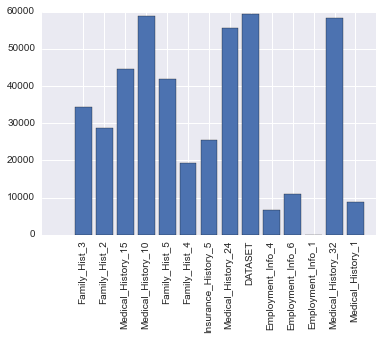

In [292]:
isnull_dict = {}
for col in df_train.columns:
    var = df_train[col].isnull().sum()
    if var > 0:
        isnull_dict[col] = var

isnull_dict['DATASET'] = df_train.shape[0]
print isnull_dict


plt.bar(range(len(isnull_dict)), isnull_dict.values(), align='center')
plt.xticks(range(len(isnull_dict)), isnull_dict.keys(), rotation=90)

plt.show()

In [37]:
# kNN

from sklearn import cross_validation
n_neighbors = range(1,51,2)
for i, n in enumerate(range(1,51,2)):
    model = kNN(n)
    model.fit(X_train, y_train)
    kscores = cross_validation.cross_val_score(model, X_train, y_train, cv=10)  
    print kscores
    
    if i == 0:
        score = kscores.mean()
    else:
        if kscores.mean() > score:
            score = kscores.mean()
            k = n
            
print score, k
#print(X_features)

[ 0.30747223  0.2953551   0.30185185  0.29925901  0.28848097  0.30447962
  0.29925901  0.30626685  0.29755687  0.30771823]
[ 0.29585998  0.28946483  0.29848485  0.30161671  0.28595487  0.29151229
  0.29083867  0.29346361  0.2946925   0.30367374]
[ 0.33288455  0.31588691  0.32592593  0.33007747  0.32266756  0.33496127
  0.32452004  0.32766173  0.33715249  0.33400741]
[ 0.35207001  0.33372602  0.34057239  0.34220276  0.3383294   0.35281239
  0.33967666  0.34989892  0.34995788  0.34496124]
[ 0.35947492  0.34634803  0.3543771   0.36173796  0.34708656  0.36443247
  0.3555069   0.35630054  0.35922494  0.35776879]
[ 0.36603837  0.35610905  0.36094276  0.36561132  0.35954867  0.37521051
  0.36695857  0.36556604  0.36647009  0.36535221]
[ 0.37361158  0.36385056  0.37053872  0.36881105  0.35870664  0.37672617
  0.37369485  0.3712938   0.37337826  0.37158746]
[ 0.37495793  0.36704813  0.37760943  0.3701583   0.36577972  0.38009431
  0.37689458  0.37011456  0.37809604  0.37175598]
[ 0.37512622  0.

In [23]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as kNN
from itertools import product
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.kernel_approximation import Nystroem

# Loading some example data
#iris = datasets.load_iris()
#X = iris.data[:, [0,2]]
#y = iris.target

#nystroem_feature = Nystroem(kernel='rbf', gamma=None, coef0=1, degree=3, kernel_params=None, n_components=126, random_state=42)
#X_features = nystroem_feature.fit_transform(X_train)

# Training classifiers
#clf1 = RandomForestClassifier(n_estimators=120, max_features=int(len(df_train.columns)**0.5), max_depth=None)
#clf2 = kNN(47)
#clf3 = SVC(kernel='rbf', probability=True)
#clf3 = SGDClassifier(loss='modified_huber', penalty='l2')
#eclf = VotingClassifier(estimators=[('rf', clf1), ('kNN', clf2), ('sgd', clf3)], voting='soft', weights=[4,2,1])

#clf1 = clf1.fit(X_train,y_train)
#clf2 = clf2.fit(X_train,y_train)
#clf3 = clf3.fit(X_train,y_train)
#eclf = eclf.fit(X_train,y_train)

#print(clf1.score(X_train, y_train))
#clf1.score(X_train, y_train)

#print(clf2.score(X_train, y_train))

#print(clf3.score(X_train, y_train))
#clf3.score(X_train, y_train)

#print(eclf.score(X_train, y_train))
#eclf.score(X_train, y_train)


import time
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
#forest = RandomForestClassifier(n_estimators=3000,
#     max_features=int(len(X_train.columns)**0.5), random_state=0, max_depth=None)
#scores = cross_validation.cross_val_score(forest, X_train, y_train)
#print "RandomForestClassifier:", scores.mean()
#print time.clock()-t0

#250 estimators: .57 -- time: 
#2500 estimators: .578 -- time: 


categorical = ['Product_Info_1', 'Product_Info_2', 'Product_Info_3', 'Product_Info_5', 'Product_Info_6', 'Product_Info_7', 'Employment_Info_2', 'Employment_Info_3', 'Employment_Info_5', 'InsuredInfo_1', 'InsuredInfo_2', 'InsuredInfo_3', 'InsuredInfo_4', 'InsuredInfo_5', 'InsuredInfo_6', 'InsuredInfo_7', 'Insurance_History_1', 'Insurance_History_2', 'Insurance_History_3', 'Insurance_History_4', 'Insurance_History_7', 'Insurance_History_8', 'Insurance_History_9', 'Family_Hist_1', 'Medical_History_2', 'Medical_History_3', 'Medical_History_4', 'Medical_History_5', 'Medical_History_6', 'Medical_History_7', 'Medical_History_8', 'Medical_History_9', 'Medical_History_10', 'Medical_History_11', 'Medical_History_12', 'Medical_History_13', 'Medical_History_14', 'Medical_History_16', 'Medical_History_17', 'Medical_History_18', 'Medical_History_19', 'Medical_History_20', 'Medical_History_21', 'Medical_History_22', 'Medical_History_23', 'Medical_History_25', 'Medical_History_26', 'Medical_History_27', 'Medical_History_28', 'Medical_History_29', 'Medical_History_30', 'Medical_History_31', 'Medical_History_33', 'Medical_History_34', 'Medical_History_35', 'Medical_History_36', 'Medical_History_37', 'Medical_History_38', 'Medical_History_39', 'Medical_History_40', 'Medical_History_41','Medical_History_1', 'Medical_History_15', 'Medical_History_24', 'Medical_History_32']

cat_train_df = X_train[categorical]
cat_train_dict = cat_train_df.T.to_dict().values()

x_train_no_cat = X_train.drop(categorical, axis=1)

from sklearn.feature_extraction import DictVectorizer as DV

vectorizer = DV(sparse=False)
vec_x_cat_train = pd.DataFrame(vectorizer.fit_transform(cat_train_dict))

x_train = pd.concat([x_train_no_cat, vec_x_cat_train], axis=1)

features=x_train.columns.tolist()
#print len(features)
#features.remove("Id")
#features.remove("Response")

train_features=x_train[features].fillna(-9999)





t0 = time.clock()

clf = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1"))),
  ('classification', RandomForestClassifier())
])
clf.fit(train_features, y_train)
scores = cross_validation.cross_val_score(clf, train_features, y_train)
print "feature selection w random forest:", scores.mean()
print time.clock()-t0

ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True

In [253]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomTreesEmbedding, ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import BaggingClassifier

#bagging = BaggingClassifier(ExtraTreesClassifier(max_depth=50, n_estimators=100, random_state=0), max_samples=0.5, max_features=0.5)
#bagging_clf = bagging.fit(X_train, y_train)
#print bagging_clf.score(X_train, y_train)
#scores = cross_val_score(bagging_clf, X_train, y_train)
#print scores.mean()


#trees = ExtraTreesClassifier(max_depth=500, n_estimators=100, random_state=42)
#trees_clf = trees.fit(X_train, y_train)
#print trees_clf.score(X_train, y_train)



#XGBoost try #1

#gbm = xgb.XGBClassifier(max_depth=30, n_estimators=100, learning_rate=0.01)
#gbm_clf = gbm.fit(X_train, y_train)
#print gbm_clf.score(X_train, y_train)




In [68]:
#XGBoost try #2
params = {"objective": "multi:softmax", "num_class": 8}
T_train_xgb = xgb.DMatrix(X_train, y_train)
X_test_xgb  = xgb.DMatrix(X_test)
gbm2 = xgb.train(params, T_train_xgb, 20)
y_pred3 = gbm2.predict(X_test_xgb)


In [70]:
#print metrics.confusion_matrix(y_train, gbm_clf.predict(X_train))



In [71]:
# change values back to range of values is from 1-8 instead of 0-7
#y_pred = clf1.predict(X_test)
#y_pred = y_pred + 1
#y_pred = y_pred.astype(int)

y_pred2 = gbm_clf.predict(X_test)
y_pred2 = y_pred2 + 1
y_pred2 = y_pred2.astype(int)


y_pred3 = y_pred3 + 1
y_pred3 = y_pred3.astype(int)

#sumsquares = sum((y_pred - y_pred2)**2)

#print metrics.confusion_matrix(y_train, eclf.predict(X_train))


#feature importance
#print pd.DataFrame(clf1.feature_importances_,index=X_train.columns).sort([0], ascending=False) [:10]
#print pd.DataFrame(clf2.feature_importances_,index=X_train.columns).sort([0], ascending=False) [:10]
#print pd.DataFrame(clf3.feature_importances_,index=X_train.columns).sort([0], ascending=False) [:10]



#print X_train.shape



#use this block to keep testing the difference between my best model and the newest model
#right now the best model is just using random forest -- the kernal approximation doesn't add much to it (the way I have it set up)

#kernal approx --> sgd + random forest --> soft voting
#think of another model that may work better

#alternatively, think of how to mess with the different types of data so that what is fed into the model is a bit better captured



In [72]:
# Create submission

submission = pd.DataFrame({
        "Id": df_test["Id"],
        "Response": y_pred2
    })
submission.to_csv('prudential.csv', index=False)

In [ ]:
## My next steps are to:
#1) organize this code to make it slightly more readable
#2) investigate making multiple models for each response output (ala Jonathan Smakla or whatever his name is)
#3) investigate XGBoost and what it is doing specifically
#4) investigate any feature selection, imputation that I am doing and modify accordingly





In [5]:
#starting here again... pk 1/6 @ 6:30pm
#todo: using the train data as a train/test set to evaluate the model before submitting
#use cross validation to really see how will perform in the wild
#can i use xgboost in this way?
#what about a bunch of log regressions with one vs all?

#think about using a function or a pipeline (see bayesian-methods in-class exercise):
#
#
#pipeline = Pipeline((
#    ('vec', TfidfVectorizer(max_df = 0.8, ngram_range = (1, 2), use_idf=True)),
#    ('clf', MultinomialNB(alpha = 0.01)),
#))





import pandas as pd 
import numpy as np
from sklearn.cross_validation import train_test_split

DATA_DIR = '/Users/patrickkennedy/Desktop'

train = pd.read_csv(DATA_DIR + '/Project DATA/train.csv')
test = pd.read_csv(DATA_DIR + '/Project DATA/test.csv')


features = train.columns
features.drop("Id")
features.drop("Response")

#let's split the train data into train/test so we can do some model validation
X_train, X_test, y_train, y_test = train_test_split(train[features], train.Response, test_size=0.1, random_state=42)


#We transform categorical values to dummies 0/1
categorical = ['Product_Info_1', 'Product_Info_2', 'Product_Info_3', 'Product_Info_5', 'Product_Info_6', 'Product_Info_7', 'Employment_Info_2', 'Employment_Info_3', 'Employment_Info_5', 'InsuredInfo_1', 'InsuredInfo_2', 'InsuredInfo_3', 'InsuredInfo_4', 'InsuredInfo_5', 'InsuredInfo_6', 'InsuredInfo_7', 'Insurance_History_1', 'Insurance_History_2', 'Insurance_History_3', 'Insurance_History_4', 'Insurance_History_7', 'Insurance_History_8', 'Insurance_History_9', 'Family_Hist_1', 'Medical_History_2', 'Medical_History_3', 'Medical_History_4', 'Medical_History_5', 'Medical_History_6', 'Medical_History_7', 'Medical_History_8', 'Medical_History_9', 'Medical_History_10', 'Medical_History_11', 'Medical_History_12', 'Medical_History_13', 'Medical_History_14', 'Medical_History_16', 'Medical_History_17', 'Medical_History_18', 'Medical_History_19', 'Medical_History_20', 'Medical_History_21', 'Medical_History_22', 'Medical_History_23', 'Medical_History_25', 'Medical_History_26', 'Medical_History_27', 'Medical_History_28', 'Medical_History_29', 'Medical_History_30', 'Medical_History_31', 'Medical_History_33', 'Medical_History_34', 'Medical_History_35', 'Medical_History_36', 'Medical_History_37', 'Medical_History_38', 'Medical_History_39', 'Medical_History_40', 'Medical_History_41','Medical_History_1', 'Medical_History_15', 'Medical_History_24', 'Medical_History_32']

#cat_train_df = train[categorical]
#cat_train_dict = cat_train_df.T.to_dict().values()

#cat_test_df = test[categorical]
#cat_test_dict = cat_test_df.T.to_dict().values()


#x_train_no_cat = train.drop(categorical, axis=1)
#x_test_no_cat = test.drop(categorical, axis=1)






Index([u'Id', u'Product_Info_1', u'Product_Info_2', u'Product_Info_3',
       u'Product_Info_4', u'Product_Info_5', u'Product_Info_6',
       u'Product_Info_7', u'Ins_Age', u'Ht', 
       ...
       u'Medical_Keyword_40', u'Medical_Keyword_41', u'Medical_Keyword_42',
       u'Medical_Keyword_43', u'Medical_Keyword_44', u'Medical_Keyword_45',
       u'Medical_Keyword_46', u'Medical_Keyword_47', u'Medical_Keyword_48',
       u'Response'],
      dtype='object', length=128)


In [ ]:
#using dict vectorizer
from sklearn.feature_extraction import DictVectorizer as DV

vectorizer = DV(sparse=False)
vec_x_cat_train = pd.DataFrame(vectorizer.fit_transform(cat_train_dict))
vec_x_cat_test = pd.DataFrame(vectorizer.transform(cat_test_dict)) 

x_train = pd.concat([x_train_no_cat, vec_x_cat_train], axis=1)
x_test = pd.concat([x_test_no_cat, vec_x_cat_test], axis=1)

#how to ensemble xgboost given that the data has been vectorized?

In [285]:
x_train.head()

,Id,Product_Info_4,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_4,Employment_Info_6,Insurance_History_5,...,73,74,75,76,77,78,79,80,81,82
0,2,0.076923,0.641791,0.581818,0.148536,0.323008,0.028,0,NaN,0.000667,...,0,0,0,1,0,0,10,2,1,1
1,5,0.076923,0.059701,0.600000,0.131799,0.272288,0.000,0,0.0018,0.000133,...,0,0,0,0,0,0,26,2,3,1
2,6,0.076923,0.029851,0.745455,0.288703,0.428780,0.030,0,0.0300,NaN,...,0,0,0,0,0,1,26,2,3,1
3,7,0.487179,0.164179,0.672727,0.205021,0.352438,0.042,0,0.2000,NaN,...,0,0,0,0,1,0,10,2,3,1
4,8,0.230769,0.417910,0.654545,0.234310,0.424046,0.027,0,0.0500,NaN,...,0,0,1,0,0,0,26,2,3,1


In [266]:
features=x_train.columns.tolist()
features.remove("Id")
features.remove("Response")

train_features=x_train[features].fillna(-9999)
test_features=x_test[features].fillna(-9999)
print(train_features)
#try to predict these missing values and then

import xgboost as xgb

#how about running a separate model for each response value? doing some sort of xgb with logistic regression
#for each and then putting all of them together


#You can improve parameters if you want, this solution is not perfect at all
param = {'max_depth':6, 'eta':0.1, 'silent':1, 'min_child_weight':3, 'subsample' : 0.7 ,"early_stopping_rounds":10,
          "objective"   : "count:poisson", 'eval_metric': 'rmse','colsample_bytree':0.65}

#"objective" = "multi:softprob",    # multiclass classification 
#              "num_class" = num.class,    # number of classes 
#              "eval_metric" = "merror",    # evaluation metric 
#              "nthread" = 8,   # number of threads to be used 
#              "max_depth" = 16,    # maximum depth of tree 
#              "eta" = 0.3,    # step size shrinkage 
#              "gamma" = 0,    # minimum loss reduction 
#              "subsample" = 1,    # part of data instances to grow tree 
#              "colsample_bytree" = 1,  # subsample ratio of columns when constructing each tree 
#              "min_child_weight" = 12  # minimum sum of instance weight needed in a child 
#              )
                
                
num_round=700

dtrain=xgb.DMatrix(train_features,label=y_train)
dtest=xgb.DMatrix(test_features)

watchlist  = [(dtrain,'train')]

bst = xgb.train(param, dtrain, num_round, watchlist)

print("Training the model")
y_test_bst=bst.predict(dtest)

#how to build a model here where i can do an ensemble method doing xgboost enough times to get to a particular result (or is this what it is doing already?)

[0]	train-rmse:4.809948
[1]	train-rmse:4.807632
[2]	train-rmse:4.805288
[3]	train-rmse:4.803633
[4]	train-rmse:4.801734
[5]	train-rmse:4.799393
[6]	train-rmse:4.797567
[7]	train-rmse:4.795777
[8]	train-rmse:4.793694
[9]	train-rmse:4.791641
[10]	train-rmse:4.789949
[11]	train-rmse:4.787881
[12]	train-rmse:4.785823
[13]	train-rmse:4.783958
[14]	train-rmse:4.782052
[15]	train-rmse:4.779992
[16]	train-rmse:4.777930
[17]	train-rmse:4.776231
[18]	train-rmse:4.774220
[19]	train-rmse:4.772139
[20]	train-rmse:4.770239
[21]	train-rmse:4.768413
[22]	train-rmse:4.766463
[23]	train-rmse:4.764475
[24]	train-rmse:4.762676
[25]	train-rmse:4.760787
[26]	train-rmse:4.758659
[27]	train-rmse:4.756709
[28]	train-rmse:4.754959
[29]	train-rmse:4.752934
[30]	train-rmse:4.750872
[31]	train-rmse:4.749055
[32]	train-rmse:4.747135
[33]	train-rmse:4.745081
[34]	train-rmse:4.743157
[35]	train-rmse:4.741351
[36]	train-rmse:4.739406
[37]	train-rmse:4.737375
[38]	train-rmse:4.735545
[39]	train-rmse:4.733650
[40]	train

       Product_Info_4   Ins_Age        Ht        Wt       BMI  \
0            0.076923  0.641791  0.581818  0.148536  0.323008   
1            0.076923  0.059701  0.600000  0.131799  0.272288   
2            0.076923  0.029851  0.745455  0.288703  0.428780   
3            0.487179  0.164179  0.672727  0.205021  0.352438   
4            0.230769  0.417910  0.654545  0.234310  0.424046   
5            0.230769  0.507463  0.836364  0.299163  0.364887   
6            0.166194  0.373134  0.581818  0.173640  0.376587   
7            0.076923  0.611940  0.781818  0.403766  0.571612   
8            0.230769  0.522388  0.618182  0.184100  0.362643   
9            0.076923  0.552239  0.600000  0.284519  0.587796   
10           0.128205  0.537313  0.690909  0.309623  0.521668   
11           0.230769  0.298507  0.690909  0.271967  0.455050   
12           0.102564  0.567164  0.618182  0.163180  0.320784   
13           0.487179  0.223881  0.781818  0.361925  0.507515   
14           0.487179  0.

In [267]:
from itertools import chain

y_test_bst[0]
#y_response = []
#for i in range(len(y_test_bst)):
#     y_response.append([j+1 for j,x in enumerate(y_test_bst[i]) if x == max(y_test_bst[i])])
    
#chain = chain.from_iterable(y_response)
#y_response = list(chain)

#print min(y_test_bst)


2.581203

In [268]:
#we need integers to fit the model

def output_function(x):
    if x<1:
        return 1
    elif x>8:
        return 8
    elif int(round(x))==3:
        return 2
    else:
        return int(round(x))
        
y_test_bst_result=[output_function(y) for y in y_test_bst]

#write results

ids=test.Id.values.tolist()
n_ids=len(ids)


import csv

prediction_file = open("pythonxgb.csv", "w")
prediction_file_object = csv.writer(prediction_file)
prediction_file_object.writerow(["Id","Response"])
for i in range(0,n_ids):
    prediction_file_object.writerow([ids[i],y_test_bst_result[i]])







In [ ]:
#starting here again... pk 1/6 @ 6:30pm
#todo: using the train data as a train/test set to evaluate the model before submitting
#use cross validation to really see how will perform in the wild
#can i use xgboost in this way?
#what about a bunch of log regressions with one vs all?

#think about using a function or a pipeline (see bayesian-methods in-class exercise):
#
#
#pipeline = Pipeline((
#    ('vec', TfidfVectorizer(max_df = 0.8, ngram_range = (1, 2), use_idf=True)),
#    ('clf', MultinomialNB(alpha = 0.01)),
#))





import pandas as pd 
import numpy as np
from sklearn.cross_validation import train_test_split

DATA_DIR = '/Users/patrickkennedy/Desktop'

train = pd.read_csv(DATA_DIR + '/Project DATA/train.csv')
test = pd.read_csv(DATA_DIR + '/Project DATA/test.csv')


features = train.columns
features.drop("Id")
features.drop("Response")

#let's split the train data into train/test so we can do some model validation
X_train, X_test, y_train, y_test = train_test_split(train[features], train.Response, test_size=0.1, random_state=42)


#We transform categorical values to dummies 0/1
categorical = ['Product_Info_1', 'Product_Info_2', 'Product_Info_3', 'Product_Info_5', 'Product_Info_6', 'Product_Info_7', 'Employment_Info_2', 'Employment_Info_3', 'Employment_Info_5', 'InsuredInfo_1', 'InsuredInfo_2', 'InsuredInfo_3', 'InsuredInfo_4', 'InsuredInfo_5', 'InsuredInfo_6', 'InsuredInfo_7', 'Insurance_History_1', 'Insurance_History_2', 'Insurance_History_3', 'Insurance_History_4', 'Insurance_History_7', 'Insurance_History_8', 'Insurance_History_9', 'Family_Hist_1', 'Medical_History_2', 'Medical_History_3', 'Medical_History_4', 'Medical_History_5', 'Medical_History_6', 'Medical_History_7', 'Medical_History_8', 'Medical_History_9', 'Medical_History_10', 'Medical_History_11', 'Medical_History_12', 'Medical_History_13', 'Medical_History_14', 'Medical_History_16', 'Medical_History_17', 'Medical_History_18', 'Medical_History_19', 'Medical_History_20', 'Medical_History_21', 'Medical_History_22', 'Medical_History_23', 'Medical_History_25', 'Medical_History_26', 'Medical_History_27', 'Medical_History_28', 'Medical_History_29', 'Medical_History_30', 'Medical_History_31', 'Medical_History_33', 'Medical_History_34', 'Medical_History_35', 'Medical_History_36', 'Medical_History_37', 'Medical_History_38', 'Medical_History_39', 'Medical_History_40', 'Medical_History_41','Medical_History_1', 'Medical_History_15', 'Medical_History_24', 'Medical_History_32']

#cat_train_df = train[categorical]
#cat_train_dict = cat_train_df.T.to_dict().values()

#cat_test_df = test[categorical]
#cat_test_dict = cat_test_df.T.to_dict().values()


#x_train_no_cat = train.drop(categorical, axis=1)
#x_test_no_cat = test.drop(categorical, axis=1)






In [ ]:
#using dict vectorizer
from sklearn.feature_extraction import DictVectorizer as DV

vectorizer = DV(sparse=False)
vec_x_cat_train = pd.DataFrame(vectorizer.fit_transform(cat_train_dict))
vec_x_cat_test = pd.DataFrame(vectorizer.transform(cat_test_dict)) 

x_train = pd.concat([x_train_no_cat, vec_x_cat_train], axis=1)
x_test = pd.concat([x_test_no_cat, vec_x_cat_test], axis=1)

#how to ensemble xgboost given that the data has been vectorized?

In [ ]:
features=x_train.columns.tolist()
features.remove("Id")
features.remove("Response")

train_features=x_train[features].fillna(-9999)
test_features=x_test[features].fillna(-9999)
print(train_features)


import xgboost as xgb

#how about running a separate model for each response value? doing some sort of xgb with logistic regression
#for each and then putting all of them together


#You can improve parameters if you want, this solution is not perfect at all
param = {'max_depth':6, 'eta':0.1, 'silent':1, 'min_child_weight':3, 'subsample' : 0.7 ,"early_stopping_rounds":10,
          "objective"   : "count:poisson", 'eval_metric': 'rmse','colsample_bytree':0.65}

#"objective" = "multi:softprob",    # multiclass classification 
#              "num_class" = num.class,    # number of classes 
#              "eval_metric" = "merror",    # evaluation metric 
#              "nthread" = 8,   # number of threads to be used 
#              "max_depth" = 16,    # maximum depth of tree 
#              "eta" = 0.3,    # step size shrinkage 
#              "gamma" = 0,    # minimum loss reduction 
#              "subsample" = 1,    # part of data instances to grow tree 
#              "colsample_bytree" = 1,  # subsample ratio of columns when constructing each tree 
#              "min_child_weight" = 12  # minimum sum of instance weight needed in a child 
#              )
                
                
num_round=700

dtrain=xgb.DMatrix(train_features,label=y_train)
dtest=xgb.DMatrix(test_features)

watchlist  = [(dtrain,'train')]

bst = xgb.train(param, dtrain, num_round, watchlist)

print("Training the model")
y_test_bst=bst.predict(dtest)

#how to build a model here where i can do an ensemble method doing xgboost enough times to get to a particular result (or is this what it is doing already?)

Dive into the code below... how are we getting a higher score? what is the code doing? what can i add to juke the score higher?

In [6]:
import time
t0 = time.clock()

import pandas as pd 
import numpy as np 
import xgboost as xgb
from scipy.optimize import fmin_powell
from ml_metrics import quadratic_weighted_kappa

def eval_wrapper(yhat, y):  
    y = np.array(y)
    y = y.astype(int)
    yhat = np.array(yhat)
    yhat = np.clip(np.round(yhat), np.min(y), np.max(y)).astype(int)   
    return quadratic_weighted_kappa(yhat, y)
    
def get_params():
    
    params = {}
    params["objective"] = "reg:linear"     
    params["eta"] = 0.01
    params["min_child_weight"] = 50
    params["subsample"] = 0.67
    params["colsample_bytree"] = 0.9
    params["silent"] = 1
    params["max_depth"] = 9
    plst = list(params.items())

    return plst
    
def apply_offset(data, bin_offset, sv, scorer=eval_wrapper):
    # data has the format of pred=0, offset_pred=1, labels=2 in the first dim
    data[1, data[0].astype(int)==sv] = data[0, data[0].astype(int)==sv] + bin_offset
    score = scorer(data[1], data[2])
    return score

# global variables
columns_to_drop = ['Id', 'Response']
xgb_num_rounds = 500 #5000 gives me good score (~15 min), 10000 (~32 min) (no improvement)
num_classes = 8

print("Load the data using pandas")
train = pd.read_csv(DATA_DIR + '/Project DATA/train.csv')
test = pd.read_csv(DATA_DIR + '/Project DATA/test.csv')

# combine train and test
all_data = train.append(test)

print('Eliminate missing values')    
# Use -1 for any others
all_data.fillna(-1, inplace=True)



# factorize categorical variables
# add all categorical vars -pk
# does this matter? and what of any feature selection beyond factorizing prod info 2?
#categorical = ['Product_Info_1', 'Product_Info_2', 'Product_Info_3', 'Product_Info_5', 'Product_Info_6', 'Product_Info_7', 'Employment_Info_2', 'Employment_Info_3', 'Employment_Info_5', 'InsuredInfo_1', 'InsuredInfo_2', 'InsuredInfo_3', 'InsuredInfo_4', 'InsuredInfo_5', 'InsuredInfo_6', 'InsuredInfo_7', 'Insurance_History_1', 'Insurance_History_2', 'Insurance_History_3', 'Insurance_History_4', 'Insurance_History_7', 'Insurance_History_8', 'Insurance_History_9', 'Family_Hist_1', 'Medical_History_2', 'Medical_History_3', 'Medical_History_4', 'Medical_History_5', 'Medical_History_6', 'Medical_History_7', 'Medical_History_8', 'Medical_History_9', 'Medical_History_10', 'Medical_History_11', 'Medical_History_12', 'Medical_History_13', 'Medical_History_14', 'Medical_History_16', 'Medical_History_17', 'Medical_History_18', 'Medical_History_19', 'Medical_History_20', 'Medical_History_21', 'Medical_History_22', 'Medical_History_23', 'Medical_History_25', 'Medical_History_26', 'Medical_History_27', 'Medical_History_28', 'Medical_History_29', 'Medical_History_30', 'Medical_History_31', 'Medical_History_33', 'Medical_History_34', 'Medical_History_35', 'Medical_History_36', 'Medical_History_37', 'Medical_History_38', 'Medical_History_39', 'Medical_History_40', 'Medical_History_41','Medical_History_1', 'Medical_History_15', 'Medical_History_24', 'Medical_History_32']



#does it matter that i am running on normalized variables? seems like it would obviate the need to do PCA...
#doing PCA on continuous variables
#continuous = ['Product_Info_4', 'Ins_Age', 'Ht', 'Wt', 'BMI', 'Employment_Info_1', 'Employment_Info_4', 'Employment_Info_6',
#              'Insurance_History_5', 'Family_Hist_2', 'Family_Hist_3', 'Family_Hist_4', 'Family_Hist_5'] 


#from sklearn.decomposition import PCA
#from sklearn.preprocessing import StandardScaler

#X_scaled = StandardScaler().fit_transform(all_data[continuous])
#pca = PCA(n_components=len(continuous), whiten=True).fit(X_scaled)
#all_data_PCA = pca.transform(X_scaled)




#PCA_titles = ['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10', 'PCA11', 'PCA12', 'PCA13']
#all_data_PCA_df = pd.DataFrame(all_data_PCA, index=all_data.index, columns=PCA_titles)
    
#add back into all_data and drop the continuous variables
#all_data_new = pd.concat([all_data, all_data_PCA_df], axis=1)
#all_data_new.drop(continuous, axis=1)



all_data['Product_Info_2'] = pd.factorize(all_data['Product_Info_2'])[0]

# fix the dtype on the label column
all_data['Response'] = all_data['Response'].astype(int)


all_data_no_response = all_data.drop('Response')

    
# Provide split column
#all_data_new['Split'] = np.random.randint(5, size=all_data_new.shape[0])

# split train and test
train = new_all_data[new_all_data['Response']>0].copy()
test = new_all_data[new_all_data['Response']<1].copy()


# convert data to xgb data structure
xgtrain = xgb.DMatrix(train.drop(columns_to_drop, axis=1), train['Response'].values)
xgtest = xgb.DMatrix(test.drop(columns_to_drop, axis=1), label=test['Response'].values)    

# get the parameters for xgboost
plst = get_params()
print(plst)      

# train model
model = xgb.train(plst, xgtrain, xgb_num_rounds) 

# get preds
train_preds = model.predict(xgtrain, ntree_limit=model.best_iteration)
print('Train score is:', eval_wrapper(train_preds, train['Response'])) 
test_preds = model.predict(xgtest, ntree_limit=model.best_iteration)




train_preds_1 = np.clip(train_preds, -0.99, 8.99)
test_preds_1 = np.clip(test_preds, -0.99, 8.99)

# train offsets 
offsets = np.array([-5.1, -0.9, 0.1, -0.9, 1.0, 0.0, 0.0, 1.0])

import itertools
perms = [x for x in itertools.permutations([0, 1, 2, 3, 4, 5, 6, 7]) if x[0] != 7 and x[1] != 7]
perms = perms[-15:]


for i, perm in enumerate(reversed(perms)):


    data = np.vstack((train_preds_1, train_preds_1, train['Response']))
    for j in range(num_classes):
        data[1, data[0].astype(int)==j] = data[0, data[0].astype(int)==j] + offsets[j] 
    for j in perm:
        train_offset = lambda x: -apply_offset(data, x, j)
        offsets[j] = fmin_powell(train_offset, offsets[j], disp=False)  
    
    # apply offsets to test
    data = np.vstack((test_preds_1, test_preds_1, test['Response']))
    for j in range(num_classes):
        data[1, data[0].astype(int)==j] = data[0, data[0].astype(int)==j] + offsets[j] 
    final_test_preds = np.round(np.clip(data[1], 1, 8)).astype(int)

preds_out = pd.DataFrame({"Id": test['Id'].values, "Response": final_test_preds})
preds_out = preds_out.set_index('Id')
preds_out.to_csv('xgb_offset_submission_more_cols.csv')

#0.66738 for order [6,7,2,5,0,3,4,1]
#0.667435 for order [6,5,7....]












#train_preds = np.clip(train_preds, -0.99, 8.99)
#test_preds = np.clip(test_preds, -0.99, 8.99)

# train offsets 
#offsets = np.ones(num_classes) * -0.5
#offset_train_preds = np.vstack((train_preds, train_preds, train['Response'].values))

#for j in range(num_classes):
#    train_offset = lambda x: -apply_offset(offset_train_preds, x, j)
#    offsets[j] = fmin_powell(train_offset, offsets[j])  


# apply offsets to test
#data = np.vstack((test_preds, test_preds, test['Response'].values))
#for j in range(num_classes):
#    data[1, data[0].astype(int)==j] = data[0, data[0].astype(int)==j] + offsets[j]    
#final_test_preds = np.round(np.clip(data[1], 1, 8)).astype(int)



#preds_out = pd.DataFrame({"Id": test['Id'].values, "Response": final_test_preds})
#preds_out = preds_out.set_index('Id')
#preds_out.to_csv('xgb_offset_submission-fewer_cols.csv')

#print time.clock()-t0

Load the data using pandas
Eliminate missing values
[('colsample_bytree', 0.9), ('silent', 1), ('min_child_weight', 50), ('subsample', 0.67), ('eta', 0.01), ('objective', 'reg:linear'), ('max_depth', 9)]
('Train score is:', 0.6746139681398773)


In [43]:
preds = test[pred_cols]
avg_pred = []

avg_pred = preds.mean(axis=1)
avg_pred = [int(x) for x in avg_pred]
#print avg_pred


final_preds = preds['preds2'].values


preds_out = pd.DataFrame({"Id": test['Id'].values, "Response": final_preds})
preds_out = preds_out.set_index('Id')
preds_out.to_csv('xgb_offset_submission.csv')



Model performs at: .66428

position = 216/1455 -- 85th percentile


Hi Muthu,
I'd be happy to!
The 'apply_offset' function applies an offset to select predictions generated from the XGBoost model. 

The 'data' variable it takes in is a numpy array with the dimensions of 3 by x, where x is the number of values 
on which to apply the offsets (i.e. the number of predictions). The values in 'data[0]' are the original 
predictions, the values in 'data[1]' are the same predictions where an offset can be applied, and the values 
in 'data[2]' are the labels against which to score the offset. There are eight offsets in total, as stored 
in the 'offsets' list variable. These apply to predictions which have as their integer value matching the 
position of the offset in the offsets list.

So, for example, if you have a prediction of 0.956, and an offset of 1 in 'offsets[0]', 
the 'apply_offset' function (and specifically the line in question) will put 1.956 in 'data[1]' 
for that prediction.

The line of code you're asking about takes the value from the original predictions (i.e. 'data[0]') 
where the offset applies (i.e. '.astype(int)==sv', which is the subset of the array where the prediction 
integer value matches 'sv', which is the position of the offset in the 'offsets' list) , applies the offset 
(i.e. ' + bin_offset'), and stores the result in the corresponding offset prediction 
(i.e. 'data[1, data[0].astype(int)==sv]').

The upshot of all this is that the predictions generated from XGBoost are offset to a value which 
increases the score. My inspiration in creating this came from other discussions I saw where people 
were using values other than 0.5 as the cutoff to decide where a prediction belongs. So, for example, 
should a prediction of 3.54 be submitted as a 3 or a 4? Using simple rounding, it would be a 4. By 
adjusting this cutoff, higher scores have been achieved, but the value will always be a 3 or a 4. I took 
this a step further, and apply an offset before rounding, so a value like 3.54 might end up being 1.54 
(if the offset was -2), which would be submitted as a 2 after rounding. I train the offsets against the 
train predictions, and then apply the resulting offsets to the test predictions before submitting.

I hope this helps.

Thanks, Michael

"""

In [4]:

all_data_no_response = all_data.drop(['Response'],axis=1)
all_data_multiplication = pd.DataFrame()

for i, colx in enumerate(all_data_no_response.columns):
    for j, coly in enumerate(all_data_no_response.columns):
        if j <= i:
            pass
        else:
            all_data_multiplication[colx+coly] = all_data_no_response[colx] * all_data_no_response[coly]









In [5]:
new_all_data = pd.concat([all_data, all_data_multiplication], axis=1)

In [105]:
train = new_all_data[new_all_data['Response']>0]
train[['Id', 'Response']]

,Id,Response
0,2,8
1,5,4
2,6,8
3,7,8
4,8,8
5,10,8
6,11,8
7,14,1
8,15,8
9,16,1


In [24]:
#what about running xgboost's logistic objective on a one vs all for all 8 classes?
#run it through with the offset too?

#can use the same training data but the response variables can be iterated through

In [78]:
import pandas as pd 
import numpy as np
from sklearn.cross_validation import train_test_split
import xgboost as xgb

def get_params():
    
    params = {}
    params["objective"] = "binary:logistic"     
    params["eta"] = 0.1
    params["min_child_weight"] = 50
    params["subsample"] = 0.5
    params["colsample_bytree"] = 0.30
    params["silent"] = 1
    params["max_depth"] = 9
    plst = list(params.items())

    return plst



DATA_DIR = '/Users/patrickkennedy/Desktop'

train = pd.read_csv(DATA_DIR + '/Project DATA/train.csv')
test = pd.read_csv(DATA_DIR + '/Project DATA/test.csv')

features = train.columns
features = features.drop("Id")
features = features.drop("Response")



y_train = train["Response"]

y_train_1 = y_train.map({1:1, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0})
y_train_2 = y_train.map({1:0, 2:1, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0})
y_train_3 = y_train.map({1:0, 2:0, 3:1, 4:0, 5:0, 6:0, 7:0, 8:0})
y_train_4 = y_train.map({1:0, 2:0, 3:0, 4:1, 5:0, 6:0, 7:0, 8:0})
y_train_5 = y_train.map({1:0, 2:0, 3:0, 4:0, 5:1, 6:0, 7:0, 8:0})
y_train_6 = y_train.map({1:0, 2:0, 3:0, 4:0, 5:0, 6:1, 7:0, 8:0})
y_train_7 = y_train.map({1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:1, 8:0})
y_train_8 = y_train.map({1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:1})

y_train_list = [y_train_1, y_train_2, y_train_3, y_train_4, y_train_5, y_train_6, y_train_7, y_train_8]
results = []

train['Product_Info_2'] = pd.factorize(train['Product_Info_2'])[0]
test['Product_Info_2'] = pd.factorize(test['Product_Info_2'])[0]

train_features = train[features].fillna(-1)
test_features = test[features].fillna(-1)
print(train_features)

               
num_round=500
plst = get_params()
print plst


for y_train_item in y_train_list:
    
    dtrain=xgb.DMatrix(train_features,label=y_train_item)
    dtest=xgb.DMatrix(test_features)

    watchlist  = [(dtrain,'train')]

    bst = xgb.train(plst, dtrain, num_round, watchlist)

    print("Training the model")
    y_test_bst=bst.predict(dtest)
    results.append(y_test_bst)

print results

#def output_function(x):
#    if x<1:
#        return 1
#    elif x>8:
#        return 8
    #elif int(round(x))==3:
    #    return 2
#    else:
#        return int(round(x))
        
#y_test_bst_result=[output_function(y) for y in y_test_bst]

#write results
#ids=test.Id.values.tolist()
#n_ids=len(ids)


#import csv
#prediction_file = open("pythonxgb.csv", "w")
#prediction_file_object = csv.writer(prediction_file)
#prediction_file_object.writerow(["Id","Response"])
#for i in range(0,n_ids):
#    prediction_file_object.writerow([ids[i],y_test_bst_result[i]])



[0]	train-error:0.104528
[1]	train-error:0.104528
[2]	train-error:0.104528
[3]	train-error:0.104528
[4]	train-error:0.104528
[5]	train-error:0.104528
[6]	train-error:0.104528
[7]	train-error:0.104528
[8]	train-error:0.104528
[9]	train-error:0.104528
[10]	train-error:0.104528
[11]	train-error:0.104528
[12]	train-error:0.104528
[13]	train-error:0.104528
[14]	train-error:0.104545
[15]	train-error:0.104545
[16]	train-error:0.104528
[17]	train-error:0.104394
[18]	train-error:0.104360
[19]	train-error:0.104276
[20]	train-error:0.104192
[21]	train-error:0.104158
[22]	train-error:0.104023
[23]	train-error:0.103872
[24]	train-error:0.103754
[25]	train-error:0.103670
[26]	train-error:0.103484
[27]	train-error:0.103400
[28]	train-error:0.103366
[29]	train-error:0.103350
[30]	train-error:0.103164
[31]	train-error:0.102962
[32]	train-error:0.102962
[33]	train-error:0.102828
[34]	train-error:0.102676
[35]	train-error:0.102592
[36]	train-error:0.102204
[37]	train-error:0.101985
[38]	train-error:0.101

       Product_Info_1  Product_Info_2  Product_Info_3  Product_Info_4  \
0                   1               0              10        0.076923   
1                   1               1              26        0.076923   
2                   1               2              26        0.076923   
3                   1               3              10        0.487179   
4                   1               4              26        0.230769   
5                   1               4              26        0.230769   
6                   1               5              10        0.166194   
7                   1               4              26        0.076923   
8                   1               0              26        0.230769   
9                   1               2              21        0.076923   
10                  1               0              26        0.128205   
11                  1               3              26        0.230769   
12                  1               6              

[0]	train-error:0.110237
[1]	train-error:0.109463
[2]	train-error:0.108503
[3]	train-error:0.110136
[4]	train-error:0.109378
[5]	train-error:0.110204
[6]	train-error:0.110220
[7]	train-error:0.110237
[8]	train-error:0.110254
[9]	train-error:0.110288
[10]	train-error:0.110204
[11]	train-error:0.110187
[12]	train-error:0.110187
[13]	train-error:0.110204
[14]	train-error:0.110170
[15]	train-error:0.110103
[16]	train-error:0.110119
[17]	train-error:0.110103
[18]	train-error:0.110136
[19]	train-error:0.110119
[20]	train-error:0.110086
[21]	train-error:0.110103
[22]	train-error:0.110119
[23]	train-error:0.110103
[24]	train-error:0.110069
[25]	train-error:0.109985
[26]	train-error:0.110018
[27]	train-error:0.109951
[28]	train-error:0.110002
[29]	train-error:0.109884
[30]	train-error:0.109749
[31]	train-error:0.109496
[32]	train-error:0.109530
[33]	train-error:0.109479
[34]	train-error:0.109547
[35]	train-error:0.109412
[36]	train-error:0.109362
[37]	train-error:0.109328
[38]	train-error:0.109


Training the model

[0]	train-error:0.017059
[1]	train-error:0.017059
[2]	train-error:0.017059
[3]	train-error:0.017059
[4]	train-error:0.017059
[5]	train-error:0.017059
[6]	train-error:0.017059
[7]	train-error:0.017059
[8]	train-error:0.017059
[9]	train-error:0.017059
[10]	train-error:0.017059
[11]	train-error:0.017059
[12]	train-error:0.017059
[13]	train-error:0.017059
[14]	train-error:0.017059
[15]	train-error:0.017059
[16]	train-error:0.017059
[17]	train-error:0.017059
[18]	train-error:0.017059
[19]	train-error:0.017059
[20]	train-error:0.017059
[21]	train-error:0.017059
[22]	train-error:0.017059
[23]	train-error:0.017059
[24]	train-error:0.017059
[25]	train-error:0.017059
[26]	train-error:0.017059
[27]	train-error:0.017059
[28]	train-error:0.017059
[29]	train-error:0.017059
[30]	train-error:0.017059
[31]	train-error:0.017059
[32]	train-error:0.017059
[33]	train-error:0.017059
[34]	train-error:0.017059
[35]	train-error:0.017059
[36]	train-error:0.017059
[37]	train-error:0.017059
[38]	train-error:0.017


Training the model

[0]	train-error:0.022953
[1]	train-error:0.021775
[2]	train-error:0.021000
[3]	train-error:0.024048
[4]	train-error:0.023560
[5]	train-error:0.023577
[6]	train-error:0.024048
[7]	train-error:0.024048
[8]	train-error:0.024048
[9]	train-error:0.024048
[10]	train-error:0.024048
[11]	train-error:0.024048
[12]	train-error:0.024048
[13]	train-error:0.024048
[14]	train-error:0.024048
[15]	train-error:0.024048
[16]	train-error:0.024048
[17]	train-error:0.024048
[18]	train-error:0.024048
[19]	train-error:0.024048
[20]	train-error:0.024048
[21]	train-error:0.024048
[22]	train-error:0.024048
[23]	train-error:0.024048
[24]	train-error:0.024048
[25]	train-error:0.024048
[26]	train-error:0.024048
[27]	train-error:0.024048
[28]	train-error:0.024048
[29]	train-error:0.024048
[30]	train-error:0.024048
[31]	train-error:0.024048
[32]	train-error:0.024048
[33]	train-error:0.024048
[34]	train-error:0.024048
[35]	train-error:0.024048
[36]	train-error:0.024048
[37]	train-error:0.024048
[38]	train-error:0.024


Training the model

[499]	train-error:0.015392
[0]	train-error:0.091410
[1]	train-error:0.091208
[2]	train-error:0.089069
[3]	train-error:0.090803
[4]	train-error:0.091056
[5]	train-error:0.091494
[6]	train-error:0.091477
[7]	train-error:0.091477
[8]	train-error:0.091326
[9]	train-error:0.091292
[10]	train-error:0.091427
[11]	train-error:0.091342
[12]	train-error:0.091056
[13]	train-error:0.091309
[14]	train-error:0.090517
[15]	train-error:0.090888
[16]	train-error:0.091140
[17]	train-error:0.091157
[18]	train-error:0.091258
[19]	train-error:0.090989
[20]	train-error:0.090517
[21]	train-error:0.090803
[22]	train-error:0.091022
[23]	train-error:0.090467
[24]	train-error:0.089894
[25]	train-error:0.090062
[26]	train-error:0.090366
[27]	train-error:0.090450
[28]	train-error:0.089945
[29]	train-error:0.088581
[30]	train-error:0.088749
[31]	train-error:0.089069
[32]	train-error:0.088496
[33]	train-error:0.088732
[34]	train-error:0.088244
[35]	train-error:0.087789
[36]	train-error:0.087402
[37]	train-error:0.08


Training the model

[499]	train-error:0.056196
[0]	train-error:0.185733
[1]	train-error:0.186221
[2]	train-error:0.185699
[3]	train-error:0.186188
[4]	train-error:0.185918
[5]	train-error:0.185750
[6]	train-error:0.186305
[7]	train-error:0.186103
[8]	train-error:0.186743
[9]	train-error:0.186036
[10]	train-error:0.186474
[11]	train-error:0.187568
[12]	train-error:0.187265
[13]	train-error:0.187922
[14]	train-error:0.186912
[15]	train-error:0.186221
[16]	train-error:0.185985
[17]	train-error:0.186390
[18]	train-error:0.186204
[19]	train-error:0.186188
[20]	train-error:0.186036
[21]	train-error:0.185834
[22]	train-error:0.185665
[23]	train-error:0.185750
[24]	train-error:0.185851
[25]	train-error:0.184840
[26]	train-error:0.184588
[27]	train-error:0.184689
[28]	train-error:0.184487
[29]	train-error:0.184268
[30]	train-error:0.184335
[31]	train-error:0.183864
[32]	train-error:0.183678
[33]	train-error:0.182584
[34]	train-error:0.181203
[35]	train-error:0.181253
[36]	train-error:0.181186
[37]	train-error:0.18


Training the model

[499]	train-error:0.128981
[0]	train-error:0.134740
[1]	train-error:0.134976
[2]	train-error:0.134403
[3]	train-error:0.135178
[4]	train-error:0.135178
[5]	train-error:0.135178
[6]	train-error:0.135178
[7]	train-error:0.135178
[8]	train-error:0.135178
[9]	train-error:0.135178
[10]	train-error:0.135178
[11]	train-error:0.135178
[12]	train-error:0.135178
[13]	train-error:0.135178
[14]	train-error:0.135178
[15]	train-error:0.135178
[16]	train-error:0.135161
[17]	train-error:0.135161
[18]	train-error:0.135161
[19]	train-error:0.135161
[20]	train-error:0.135161
[21]	train-error:0.135161
[22]	train-error:0.135178
[23]	train-error:0.135161
[24]	train-error:0.135144
[25]	train-error:0.135144
[26]	train-error:0.135144
[27]	train-error:0.135144
[28]	train-error:0.135144
[29]	train-error:0.135144
[30]	train-error:0.135094
[31]	train-error:0.134993
[32]	train-error:0.135026
[33]	train-error:0.134959
[34]	train-error:0.134875
[35]	train-error:0.134841
[36]	train-error:0.134757
[37]	train-error:0.13


Training the model

[499]	train-error:0.101716
[0]	train-error:0.223354
[1]	train-error:0.216450
[2]	train-error:0.203078
[3]	train-error:0.198616
[4]	train-error:0.197875
[5]	train-error:0.198329
[6]	train-error:0.200165
[7]	train-error:0.198919
[8]	train-error:0.198582
[9]	train-error:0.193732
[10]	train-error:0.194726
[11]	train-error:0.192991
[12]	train-error:0.191290
[13]	train-error:0.191947
[14]	train-error:0.190583
[15]	train-error:0.188528
[16]	train-error:0.187383
[17]	train-error:0.187400
[18]	train-error:0.185783
[19]	train-error:0.184857
[20]	train-error:0.184823
[21]	train-error:0.183544
[22]	train-error:0.183645
[23]	train-error:0.183240
[24]	train-error:0.180462
[25]	train-error:0.176993
[26]	train-error:0.174601
[27]	train-error:0.173675
[28]	train-error:0.173456
[29]	train-error:0.171267
[30]	train-error:0.171099
[31]	train-error:0.168909
[32]	train-error:0.168370
[33]	train-error:0.166855
[34]	train-error:0.166164
[35]	train-error:0.165558
[36]	train-error:0.164868
[37]	train-error:0.16


Training the model
[array([ 0.18189684,  0.04002952,  0.04911706, ...,  0.48660439,
        0.06455781,  0.11096793], dtype=float32), array([ 0.17126404,  0.0457582 ,  0.05060061, ...,  0.04708283,
        0.50229567,  0.10515675], dtype=float32), array([ 0.0008391 ,  0.0017683 ,  0.00484451, ...,  0.00301457,
        0.00108978,  0.23855457], dtype=float32), array([ 0.00146568,  0.00941631,  0.00471496, ...,  0.00029976,
        0.0004955 ,  0.14125332], dtype=float32), array([ 0.01392779,  0.03226906,  0.0184226 , ...,  0.15576909,
        0.15073209,  0.00133464], dtype=float32), array([ 0.35438439,  0.20778076,  0.4477694 , ...,  0.45147094,
        0.04487349,  0.01616646], dtype=float32), array([ 0.43252948,  0.10000362,  0.22745346, ...,  0.0650955 ,
        0.00200009,  0.01805603], dtype=float32), array([  1.94472168e-02,   6.49320722e-01,   1.42768472e-01, ...,
         1.84513605e-03,   9.91599634e-03,   3.55532655e-04], dtype=float32)]


[499]	train-error:0.117613


In [79]:
print results

[array([ 0.18189684,  0.04002952,  0.04911706, ...,  0.48660439,
        0.06455781,  0.11096793], dtype=float32), array([ 0.17126404,  0.0457582 ,  0.05060061, ...,  0.04708283,
        0.50229567,  0.10515675], dtype=float32), array([ 0.0008391 ,  0.0017683 ,  0.00484451, ...,  0.00301457,
        0.00108978,  0.23855457], dtype=float32), array([ 0.00146568,  0.00941631,  0.00471496, ...,  0.00029976,
        0.0004955 ,  0.14125332], dtype=float32), array([ 0.01392779,  0.03226906,  0.0184226 , ...,  0.15576909,
        0.15073209,  0.00133464], dtype=float32), array([ 0.35438439,  0.20778076,  0.4477694 , ...,  0.45147094,
        0.04487349,  0.01616646], dtype=float32), array([ 0.43252948,  0.10000362,  0.22745346, ...,  0.0650955 ,
        0.00200009,  0.01805603], dtype=float32), array([  1.94472168e-02,   6.49320722e-01,   1.42768472e-01, ...,
         1.84513605e-03,   9.91599634e-03,   3.55532655e-04], dtype=float32)]


In [94]:
df = pd.DataFrame()
df['1'] = results[0]
df['2'] = results[1]
df['3'] = results[2]
df['4'] = results[3]
df['5'] = results[4]
df['6'] = results[5]
df['7'] = results[6]
df['8'] = results[7]


#print df.max(axis=1)
df['Response'] = df.idxmax(axis=1)

print df['Response'].value_counts()
df['Response'] = [int(x) for x in df['Response']]

print df['Response'].tail

8    8405
6    3971
7    2509
5    1624
1    1306
2    1199
4     477
3     274
dtype: int64
<bound method Series.tail of 0        7
1        8
2        6
3        8
4        8
5        8
6        8
7        8
8        7
9        8
10       8
11       8
12       4
13       8
14       6
15       8
16       7
17       8
18       8
19       2
20       8
21       8
22       8
23       8
24       6
25       7
26       8
27       8
28       2
29       8
        ..
19735    7
19736    8
19737    2
19738    2
19739    6
19740    8
19741    8
19742    1
19743    8
19744    6
19745    6
19746    6
19747    5
19748    6
19749    1
19750    2
19751    8
19752    2
19753    6
19754    8
19755    6
19756    2
19757    7
19758    6
19759    8
19760    8
19761    8
19762    1
19763    2
19764    3
Name: Response, dtype: int64>


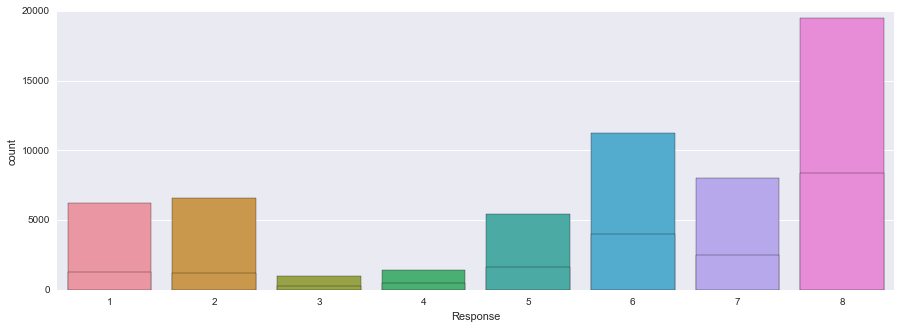

In [91]:
# response

fig, (axis1) = plt.subplots(1,1,figsize=(15,5))

sns.countplot(x=df_train["Response"], order=[1,2,3,4,5,6,7,8], ax=axis1)

sns.countplot(x=df['Response'], order=[1,2,3,4,5,6,7,8], ax=axis1)

In [95]:
ids=test.Id.values.tolist()
n_ids=len(ids)
print n_ids

import csv
prediction_file = open("pythonxgb_log_models.csv", "w")
prediction_file_object = csv.writer(prediction_file)
prediction_file_object.writerow(["Id","Response"])
for i in range(0,n_ids):
    prediction_file_object.writerow([ids[i],df.Response[i]])

19765


In [107]:
#gives .56 value... something isn't quite working here... distribution looks ok, but something is going on...
#why is it that the offset works better? can we do some sort of automatic stacking of models?
#look at the blend_proba code


#also, look at splitting the train data into train/test, build a model, use offsets, then train on the whole train set
#then build another model on the test set ... ?

#also look at PCA for some of the features? what matters?

from sklearn.decomposition import RandomizedPCA
pca = RandomizedPCA(n_components=len(continuous), whiten=True)
pca.fit(all_data[continuous])
all_data_PCA = pca.transform(all_data[continuous])

print all_data_PCA


[[ 1.52752712  0.50186294  1.79943693 ...,  0.55049441 -0.43970673
   1.99920694]
 [-0.69371596  0.2604454   0.00731395 ...,  0.6305631  -0.23592076
   2.05640008]
 [-0.86663126  0.24700322  0.30434995 ..., -0.69134298  0.37171367
  -0.48218256]
 ..., 
 [ 1.54360409  0.58399225 -0.4725698  ...,  0.48453356  0.37030027
   0.17605427]
 [ 1.53546352  0.50760388 -0.04449644 ...,  1.10299749 -0.05368743
   1.13230296]
 [-0.91236242  0.0948748  -1.86525751 ..., -1.27072336 -1.40417435
   0.36537064]]


In [116]:
from sklearn.decomposition import RandomizedPCA
pca = RandomizedPCA(n_components=len(continuous), whiten=True)
pca.fit(all_data[continuous])
all_data_PCA = pca.transform(all_data[continuous])

PCA_titles = ['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10', 'PCA11', 'PCA12', 'PCA13']
all_data_PCA_df = pd.DataFrame(all_data_PCA, index=all_data.index, columns=PCA_titles)
    


#add back into all_data and drop the continuous variables
all_data_new = pd.concat([all_data, all_data_PCA_df], axis=1)
all_data_new.drop(continuous, axis=1)


Index([u'BMI', u'Employment_Info_1', u'Employment_Info_2',
       u'Employment_Info_3', u'Employment_Info_4', u'Employment_Info_5',
       u'Employment_Info_6', u'Family_Hist_1', u'Family_Hist_2',
       u'Family_Hist_3', 
       ...
       u'PCA4', u'PCA5', u'PCA6', u'PCA7', u'PCA8', u'PCA9', u'PCA10',
       u'PCA11', u'PCA12', u'PCA13'],
      dtype='object', length=142)


In [13]:
from gplearn.genetic import SymbolicRegressor
from gplearn.genetic import SymbolicTransformer


DATA_DIR = '/Users/patrickkennedy/Desktop'

print("Load the data using pandas")
train = pd.read_csv(DATA_DIR + '/Project DATA/train.csv')
test = pd.read_csv(DATA_DIR + '/Project DATA/test.csv')

# combine train and test
all_data = train.append(test)

print('Eliminate missing values')    
# Use -1 for any others
all_data.fillna(-1, inplace=True)

categorical = ['Product_Info_1', 'Product_Info_2', 'Product_Info_3', 'Product_Info_5', 'Product_Info_6', 'Product_Info_7', 'Employment_Info_2', 'Employment_Info_3', 'Employment_Info_5', 'InsuredInfo_1', 'InsuredInfo_2', 'InsuredInfo_3', 'InsuredInfo_4', 'InsuredInfo_5', 'InsuredInfo_6', 'InsuredInfo_7', 'Insurance_History_1', 'Insurance_History_2', 'Insurance_History_3', 'Insurance_History_4', 'Insurance_History_7', 'Insurance_History_8', 'Insurance_History_9', 'Family_Hist_1', 'Medical_History_2', 'Medical_History_3', 'Medical_History_4', 'Medical_History_5', 'Medical_History_6', 'Medical_History_7', 'Medical_History_8', 'Medical_History_9', 'Medical_History_10', 'Medical_History_11', 'Medical_History_12', 'Medical_History_13', 'Medical_History_14', 'Medical_History_16', 'Medical_History_17', 'Medical_History_18', 'Medical_History_19', 'Medical_History_20', 'Medical_History_21', 'Medical_History_22', 'Medical_History_23', 'Medical_History_25', 'Medical_History_26', 'Medical_History_27', 'Medical_History_28', 'Medical_History_29', 'Medical_History_30', 'Medical_History_31', 'Medical_History_33', 'Medical_History_34', 'Medical_History_35', 'Medical_History_36', 'Medical_History_37', 'Medical_History_38', 'Medical_History_39', 'Medical_History_40', 'Medical_History_41','Medical_History_1', 'Medical_History_15', 'Medical_History_24', 'Medical_History_32']
continuous = ['Product_Info_4', 'Ins_Age', 'Ht', 'Wt', 'BMI', 'Employment_Info_1', 'Employment_Info_4', 'Employment_Info_6',
              'Insurance_History_5', 'Family_Hist_2', 'Family_Hist_3', 'Family_Hist_4', 'Family_Hist_5'] 


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(all_data[continuous])
pca = PCA(n_components=len(continuous), whiten=True).fit(X_scaled)
all_data_PCA = pca.transform(X_scaled)

PCA_titles = ['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10', 'PCA11', 'PCA12', 'PCA13']
all_data_PCA_df = pd.DataFrame(all_data_PCA, index=all_data.index, columns=PCA_titles)
    
#add back into all_data and drop the continuous variables
all_data_new = pd.concat([all_data, all_data_PCA_df], axis=1)
all_data_new.drop(continuous, axis=1)

all_data_new['Product_Info_2'] = pd.factorize(all_data_new['Product_Info_2'])[0]

# fix the dtype on the label column
all_data_new['Response'] = all_data_new['Response'].astype(int)

# Provide split column
all_data_new['Split'] = np.random.randint(5, size=all_data_new.shape[0])

# split train and test
train = all_data_new[all_data_new['Response']>0].copy()
test = all_data_new[all_data_new['Response']<1].copy()


#using dict vectorizer
from sklearn.feature_extraction import DictVectorizer as DV
cat_train_df = train[categorical]
cat_train_dict = cat_train_df.T.to_dict().values()
cat_test_df = test[categorical]
cat_test_dict = cat_test_df.T.to_dict().values()
x_train_no_cat = train.drop(categorical, axis=1)
x_test_no_cat = test.drop(categorical, axis=1)
vectorizer = DV(sparse=False)
vec_x_cat_train = pd.DataFrame(vectorizer.fit_transform(cat_train_dict))
vec_x_cat_test = pd.DataFrame(vectorizer.transform(cat_test_dict)) 

x_train = pd.concat([x_train_no_cat, vec_x_cat_train], axis=1)
x_test = pd.concat([x_test_no_cat, vec_x_cat_test], axis=1)


est_gp = SymbolicRegressor(population_size=5000,
                           generations=20, stopping_criteria=0.01,
                           comparison=False, transformer=False,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0)
est_gp.fit(x_train, y_train)
y_gp = est_gp.predict(x_test)



#gp = SymbolicTransformer(generations=20, population_size=2000,
#                         hall_of_fame=100, n_components=10,
#                         parsimony_coefficient=0.0005,
#                         max_samples=0.9, verbose=1,
#                         random_state=0, n_jobs=3)
#gp.fit(boston.data[:300, :], boston.target[:300])

#gp_features = gp.transform(boston.data)
#new_boston = np.hstack((boston.data, gp_features))




Load the data using pandas
Eliminate missing values
    |    Population Average   |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    25.56    8995657.34371        3 0.00928108977957 0.00942919683448      7.51m


In [ ]:
#how to do a multiclass classification with a genetic algorithm like this?

In [40]:




"""
Purpose: This script tries to implement a technique called stacking/blending/stacked generalization.
The reason I have to make this a runnable script because I found that there isn't really any
readable code that demonstrates this technique. You may find the pseudocode in various papers but they
are all each kind of different.
Author: Eric Chio "log0" <im.ckieric@gmail.com>
======================================================================================================
Summary:
Just to test an implementation of stacking. Using a cross-validated random forest and SVMs, I was
only able to achieve an accuracy of about 88% (with 1000 trees and up). Using stacked generalization 
I have seen a maximum of 93.5% accuracy. It does take runs to find it out though. This uses only 
(10, 20, 10) trees for the three classifiers.
This code is heavily inspired from the code shared by Emanuele (https://github.com/emanuele) , but I
have cleaned it up to makeit available for easy download and execution.
======================================================================================================
Methodology:
Three classifiers (RandomForestClassifier, ExtraTreesClassifier and a GradientBoostingClassifier
are built to be stacked by a LogisticRegression in the end.
Some terminologies first, since everyone has their own, I'll define mine to be clear:
- DEV SET, this is to be split into the training and validation data. It will be cross-validated.
- TEST SET, this is the unseen data to validate the generalization error of our final classifier. This
set will never be used to train.
======================================================================================================
Log Output:
X_test.shape = (62L, 6L)
blend_train.shape = (247L, 3L)
blend_test.shape = (62L, 3L)
Training classifier [0]
Fold [0]
Fold [1]
Fold [2]
Fold [3]
Fold [4]
Training classifier [1]
Fold [0]
Fold [1]
Fold [2]
Fold [3]
Fold [4]
Training classifier [2]
Fold [0]
Fold [1]
Fold [2]
Fold [3]
Fold [4]
Y_dev.shape = 247
Accuracy = 0.935483870968
======================================================================================================
Data Set Information:
Biomedical data set built by Dr. Henrique da Mota during a medical residence period in the Group
of Applied Research in Orthopaedics (GARO) of the Centre MÃ©dico-Chirurgical de RÃ©adaptation des
Massues, Lyon, France. The data have been organized in two different but related classification
tasks. The first task consists in classifying patients as belonging to one out of three
categories: Normal (100 patients), Disk Hernia (60 patients) or Spondylolisthesis (150
patients). For the second task, the categories Disk Hernia and Spondylolisthesis were merged 
into a single category labelled as 'abnormal'. Thus, the second task consists in classifying
patients as belonging to one out of two categories: Normal (100 patients) or Abnormal (210 
patients). We provide files also for use within the WEKA environment.
Attribute Information:
Each patient is represented in the data set by six biomechanical attributes derived from the 
shape and orientation of the pelvis and lumbar spine (in this order): pelvic incidence, pelvic
tilt, lumbar lordosis angle, sacral slope, pelvic radius and grade of spondylolisthesis. The
following convention is used for the class labels: DH (Disk Hernia), Spondylolisthesis (SL),
Normal (NO) and Abnormal (AB).
"""
import csv
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from scipy.optimize import fmin_powell
from ml_metrics import quadratic_weighted_kappa

def run(data):
    data['Product_Info_2'] = pd.factorize(data['Product_Info_2'])[0]
    data.fillna(-1, inplace=True)

    #X = np.array([ i[1:-1] for i in data ], dtype=float)
    #Y = np.array([ i[-1] for i in data ])
    features = data.columns
    features = features.drop("Id")
    features = features.drop("Response")
    X = data[features]
    Y = data["Response"]
    
    
    # We need to transform the string output to numeric
    #label_encoder = LabelEncoder()
    #label_encoder.fit(Y)
    #Y = label_encoder.transform(Y)
    
    # The DEV SET will be used for all training and validation purposes
    # The TEST SET will never be used for training, it is the unseen set.
    dev_cutoff = len(Y) * 4/5
    X_dev = X[:dev_cutoff]
    Y_dev = Y[:dev_cutoff]
    X_test = X[dev_cutoff:]
    Y_test = Y[dev_cutoff:]
    
    #print X_dev.shape, Y_dev.shape, X_test.shape, Y_test.shape
    
    n_trees = 10
    n_folds = 5
    
    # Our level 0 classifiers
    clfs = [
        RandomForestClassifier(n_estimators = n_trees, criterion = 'gini'),
        ExtraTreesClassifier(n_estimators = n_trees * 2, criterion = 'gini'),
        GradientBoostingClassifier(n_estimators = n_trees),
    ]
    
    # Ready for cross validation
    skf = list(StratifiedKFold(Y_dev, n_folds))

    # Pre-allocate the data
    blend_train = np.zeros((X_dev.shape[0], len(clfs))) # Number of training data x Number of classifiers
    blend_test = np.zeros((X_test.shape[0], len(clfs))) # Number of testing data x Number of classifiers
    
    print 'X_test.shape = %s' % (str(X_test.shape))
    print 'blend_train.shape = %s' % (str(blend_train.shape))
    print 'blend_test.shape = %s' % (str(blend_test.shape))
    
    # For each classifier, we train the number of fold times (=len(skf))
    for j, clf in enumerate(clfs):
        print 'Training classifier [%s]' % (j)
        blend_test_j = np.zeros((X_test.shape[0], len(skf))) # Number of testing data x Number of folds , we will take the mean of the predictions later
        for i, (train_index, cv_index) in enumerate(skf):
            print 'Fold [%s]' % (i)
            # This is the training and validation set
            X_train = X_dev[train_index[0]:train_index[-1]]
            Y_train = Y_dev[train_index[0]:train_index[-1]]
            X_cv = X_dev[cv_index[0]:cv_index[-1]]
            Y_cv = Y_dev[cv_index[0]:cv_index[-1]]
            
            clf.fit(X_train, Y_train)
            
            # This output will be the basis for our blended classifier to train against,
            # which is also the output of our classifiers
            blend_train[cv_index, j] = clf.predict(X_cv)
            blend_test_j[:, i] = clf.predict(X_test)
        # Take the mean of the predictions of the cross validation set
        blend_test[:, j] = blend_test_j.mean(1)
    
    print 'Y_dev.shape = %s' % (Y_dev.shape)
    
    # Start blending!
    bclf = LogisticRegression()
    bclf.fit(blend_train, Y_dev)
    
    # Predict now
    Y_test_predict = bclf.predict(blend_test)
    score = metrics.accuracy_score(Y_test, Y_test_predict)
    print 'Accuracy = %s' % (score)
    
    return score

if __name__ == '__main__':
    DATA_DIR = '/Users/patrickkennedy/Desktop'

    train = pd.read_csv(DATA_DIR + '/Project DATA/train.csv')

    #data = [ i for i in csv.reader(file(train_file, 'rb'), delimiter=' ') ]
    #data = data[1:] # remove header
    
    best_score = 0.0
    
    # run many times to get a better result, it's not quite stable.
    for i in xrange(1):
        print 'Iteration [%s]' % (i)
        train.sample(frac=1)
        score = run(train)
        best_score = max(best_score, score)
        print
        
    print 'Best score = %s' % (best_score)
    
    
    
    

Iteration [0]
X_test.shape = (11877, 126)
blend_train.shape = (47504, 3)
blend_test.shape = (11877, 3)
Training classifier [0]
Fold [0]


ValueError: shape mismatch: value array of shape (10452,) could not be broadcast to indexing result of shape (9504,)

In [30]:
#the above code shows a stacked and blended model... stacking means using multiple models
#taking their outputs and putting into another DF composed of just those results,
#then running another model (like a logistic regression) on that DF
#using that model to predict the test set(?notquite... seems to predict the test set across each clf and then mean()
#them into one list, then use *this* set to run the 2nd layer model)

#try to organize this info with the dataset I have... train a handful of xgboosts, randomforests, whatever else,
#then run it through a second layer or xgboosts and/or NN or whatever, then maybe a third level?

#what i also want to know is how well the model is doing so that i don't submit multiple times... how?
#thought: i can do a quadratic weighted kappa on my current model and see if it performs better or worse,
#as well as compare it to it's general training accuracy -- if high acc but lower than my model, overfit

#step 1: organize the current flow to train multiple classifiers
#step 2: use a second level classifier and test the result
#step 3: organize code into distinct functions so that i can plug and play
#step 4: pick models... see if training 100 different models makes a difference

print X_dev

NameError: name 'X_dev' is not defined

In [35]:
DATA_DIR = '/Users/patrickkennedy/Desktop'

print("Load the data using pandas")
train = pd.read_csv(DATA_DIR + '/Project DATA/train.csv')
test = pd.read_csv(DATA_DIR + '/Project DATA/test.csv')

# combine train and test
all_data = train.append(test)

print('Eliminate missing values')    
# Use -1 for any others
all_data.fillna(-1, inplace=True)

Load the data using pandas
Eliminate missing values


In [39]:
all_data[1:4]

,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,Family_Hist_1,Family_Hist_2,Family_Hist_3,...,Medical_Keyword_9,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Response,Wt
1,0.272288,0.000,1,3,0,2,0.0018,2,0.188406,-1,...,0,1,A1,26,0.076923,2,3,1,4,0.131799
2,0.428780,0.030,9,1,0,2,0.0300,3,0.304348,-1,...,0,1,E1,26,0.076923,2,3,1,8,0.288703
3,0.352438,0.042,9,1,0,3,0.2000,3,0.420290,-1,...,0,1,D4,10,0.487179,2,3,1,8,0.205021


In [1]:
import csv
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors as kNN
from xgboost import XGBClassifier, XGBRegressor
import xgboost as xgb
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.manifold import TSNE
from sklearn.cluster import MiniBatchKMeans


from sklearn.svm import SVC
from scipy.optimize import fmin_powell
from ml_metrics import quadratic_weighted_kappa

#from numba import autojit
import time

In [90]:
def get_params(n):
    #think about varying colsample_bytree to 1, 0.5, .25, .1
    #then running a few different xgboost models (?) 
    params = {}
    
    if "XGB-LinReg" in n:
        params["objective"] = "reg:linear"     
    elif "XGB-poisson" in n:
        params["objective"] = "count:poisson"     
    elif "XGB-multisoftmax" in n:
        params["objective"] = "multi:softmax" 
        params["num_class"] = 8

    params["eta"] = 0.01
    params["min_child_weight"] = 50
    params["subsample"] = 0.5
    params["colsample_bytree"] = 0.3
    params["silent"] = 1
    params["max_depth"] = 9
    #params["nthread"] = 16  #apparently doesn't work on mac b/c mac doesn't support open-cl or something
        
        
    plst = list(params.items())    
    return plst

def eval_wrapper(yhat, y):  
    y = np.array(y)
    y = y.astype(int)
    yhat = np.array(yhat)
    yhat = np.clip(np.round(yhat), np.min(y), np.max(y)).astype(int)   
    return quadratic_weighted_kappa(yhat, y)

def apply_offset(data, bin_offset, sv, scorer=eval_wrapper):
    # data has the format of pred=0, offset_pred=1, labels=2 in the first dim
    data[1, data[0].astype(int)==sv] = data[0, data[0].astype(int)==sv] + bin_offset
    score = scorer(data[1], data[2])
    return score

def generate_clfs(n):
    # Our level 0 classifiers
    #think about adding any NN like lasagne? h20? adaboost? sofia? vowelwabbit?
    #also put classifiers into a list of lists so that I can organize and do a for loop iterating
    #     over the train_and_cv function? that way we can have auto stacking
    #but what of the ranking or order? how do we preserve this rather than 1 in a 8,8,8,8,8 throwing it off to a 7?
    
    #next steps: 1) use PCA on variables before putting into model -- check! (doesn't work)
    #            2) take t-SNE and with the returned dataset, use XGBoost in first stage (freezes comp)
    #            3) use some models with raw data (like knn)
    #            4) make use of a neural network algo like Lasagne or Keras (but how?)
    #            5) try to mimic what the other first place winners did...
    #            6) think about transforming dataset and running same models i.e. XGBoost
    #            7) try minibatch k-means as well (with log, raw, t-SNE, other?)
    #            8) what about gridsearch for SGD, SVC, XGB? (would minimize the run time which stands at about 6 hrs)
    #            9) think about how to take the result of the model, find out how well it correlates to other models,
    #               prefer uncorrelated models, optimize preds against actual training data, pick models that give
    #               best and worst(?) scores and include those in the ensemble - somehow make use of spark/distributed
    #               platform to get speeds up
    #           10) could be worth trying logistic regression with multi_class=multinomial
    
    clfs = [[
        GaussianNB(),
        MiniBatchKMeans(n_clusters=8),
        "XGB-LinReg", #(objective="reg:linear"),
        "XGB-poisson", #(objective="count:poisson"),
        "XGB-multisoftmax", #(objective="multi:softmax"),
        "XGB-LinReg--squared(x)", #(get_params()),
        "XGB-poisson--squared(x)", #XGBClassifier(objective="count:poisson"),
        "XGB-multisoftmax--squared(x)"#, #XGBClassifier(objective="multi:softmax"),
        "XGB-LinReg--log(x)"#, #(get_params()),
        "XGB-poisson--log(x)", #XGBClassifier(objective="count:poisson"),
        "XGB-multisoftmax--log(x)"#, #XGBClassifier(objective="multi:softmax"),
        RandomForestClassifier(n_estimators = n, criterion = 'gini')#,
        ExtraTreesClassifier(n_estimators = n * 2, criterion = 'gini')#,
        GradientBoostingClassifier(n_estimators = n),
        KNeighborsClassifier(n_neighbors = 3),
        KNeighborsClassifier(n_neighbors = 5),
        KNeighborsClassifier(n_neighbors = 7),
        KNeighborsClassifier(n_neighbors = 9),
        KNeighborsClassifier(n_neighbors = 11),
        KNeighborsClassifier(n_neighbors = 13),
        KNeighborsClassifier(n_neighbors = 15),
        KNeighborsClassifier(n_neighbors = 17),
        KNeighborsClassifier(n_neighbors = 19),
        KNeighborsClassifier(n_neighbors = 21),
        LinearSVC(), #maybe use LinearSVC (better for larger samples)
        SGDClassifier(loss='perceptron'),
        SGDClassifier(loss='squared_loss'), #regression loss
        ],
        
        [
        "XGB-LinReg",
        AdaBoostClassifier()
        ]
    ]
    
    columns = [[#"GaussianNB", 
                #"MiniBatchKMeans(8)",
                "XGB-LinReg"#, 
                #"XGB-poisson", 
                #"XGB-multisoftmax", 
                #"XGB-LinReg--squared(x)", 
                #"XGB-poisson--squared(x)", 
                #"XGB-multisoftmax--squared(x)"#,
                #"XGB-LinReg--log(x)"#, 
                #"XGB-poisson--log(x)", 
                #"XGB-multisoftmax--log(x)"#,
                #"RF"#, 
                #"ExtraTrees", 
                #"GBoost", 
                #"kNN=3", 
                #"kNN=5", 
                #"kNN=7", 
                #"kNN=9", "kNN=11", "kNN=13",
                #"kNN=15", "kNN=17", "kNN=19", "kNN=21", 
                #"LinearSVC", 
                #"SGD-squaredhinge", 
                #"SGD-hinge",
                #"SGD-modified_huber", 
                #"SGD-perceptron", 
                #"SGD-squared_loss"#, 
                #"SGD-huber", 
                #"SGD-epsilon_insensitive"#, 
                #"SGD-squared_epsilon_insensitive"
                ],
               [#"XGB-LinReg",
                #"XGB-multisoftmax",
                #"XGB-LinReg--squared(x)",
                #"AdaBoost"
               ]]
    
    return clfs, columns
    


In [93]:
def run(data, for_score):    
    #data['Product_Info_2'] = pd.factorize(data['Product_Info_2'])[0]
    data.fillna(-1, inplace=True)
    
    
    #add a real_deal boolean so that i don't have to recode when i use test/train vs kaggle submission
    features = data.columns
    features = features.drop("Id")
    features = features.drop("Response")
    
    
    #DO NOT RUN TSNE!!!! FREEZES THE COMPUTER
    #model = TSNE(n_components=3, random_state=0)
    #data_TSNE = model.fit_transform(data[continuous])
    #pd.concat([data[features]])
    
    if for_score:

        train = data[data['Response']>0].copy()
        test = data[data['Response']<1].copy()
                
        X = train[features].as_matrix()
        init_y = train["Response"]-1
        Y = init_y.as_matrix()
        
        X_dev = X[:]
        Y_dev = Y[:]
        X_test = test[features]
        

        
        
    else:
        data = data[data['Response']>0].copy()    
        X = data[features].as_matrix()
        
        
        transform_type = "None"
        
        if transform_type == "log":
            X = np.log(X)
        elif transform_type == "log+X":
            x = np.log(X)
            X = np.column_stack((X,x))
            print "new shape: X: "
            print X.shape
        elif transform_type == "squared":
            X = X**2
        elif transform_type == "squared+X":
            x = X**2
            X = np.column_stack((X, x))
            print "new shape: X: "
            print X.shape
        else:
            pass
        
        print "Features transformed: " + transform_type
        
        init_y = data["Response"]-1
        Y = init_y.as_matrix()
        
        # The DEV SET will be used for all training and validation purposes
        # The TEST SET will never be used for training, it is the unseen set.
        dev_cutoff = len(Y) * 4/5
        X_dev = X[:dev_cutoff]
        Y_dev = Y[:dev_cutoff]
        X_test = X[dev_cutoff:]  #test[features]
        Y_test = Y[dev_cutoff:]  #test[dev_cutoff:]
        
    
    

    n_trees = 100
    n_folds = 3
    
    clfs, columns = generate_clfs(n_trees)
    print "Number clfs level 1: " + str(len(clfs[0])) + "; level 2: " + str(len(clfs[1]))
    
    # Ready for cross validation
    skf = list(StratifiedKFold(Y_dev, n_folds))
    # For each classifier, we train the number of fold times (=len(skf))
    
    
    levels = 1
    
    for i in range(levels):        
        blend_train, blend_test = train_and_cv(clfs[0], skf, X_dev, Y_dev, X_test, columns[0])
        X_dev = blend_train
        X_test = blend_test
        
    
    blend_train_preds = blend_train.mean(1)
    blend_test_preds = blend_test.mean(1)
    
    blend_train_preds = blend_train_preds+1
    blend_test_preds = blend_test_preds+1
    
    int_train_preds = np.clip(blend_train_preds, -0.99, 8.99).astype(int)
    int_test_preds = np.clip(blend_test_preds, -0.99, 8.99).astype(int)
    #splits = [1, 2.5, 3.5, 4, 5.2, 6.8, 7.5, 8]
    #int_train_preds = np.digitize(blend_train_preds, splits).astype(int)
    #int_test_preds = np.digitize(blend_test_preds, splits).astype(int)
    
    num_classes=8
    #train offsets 
    offsets = np.ones(num_classes) * -0.5
    offset_train_preds = np.vstack((int_train_preds, int_train_preds, Y_dev))

    for j in range(num_classes):
        train_offset = lambda x: -apply_offset(offset_train_preds, x, j)
        offsets[j] = fmin_powell(train_offset, offsets[j])  


    # apply offsets to test
    int_test_vals = (int_test_preds*0)-1
    data_off = np.vstack((int_test_preds, int_test_preds, int_test_vals))  #here we exchange test response with -1
    for j in range(num_classes):
        data_off[1, data_off[0].astype(int)==j] = data_off[0, data_off[0].astype(int)==j] + offsets[j]    
    final_test_preds = np.round(np.clip(data_off[1], 1, 8)).astype(int)
    #final_test_preds = np.digitize(data_off[1], splits).astype(int)
    
    if for_score:
        preds_out = pd.DataFrame({"Id": test['Id'].values, "Response": final_test_preds})
        preds_out = preds_out.set_index('Id')
        preds_out.to_csv('ensemble.csv')
    
    else:
        # Predict now
        score = eval_wrapper(final_test_preds, Y_test)
        print 'Accuracy = %s' % (score)
    
    return final_test_preds, blend_train, blend_test #, score

In [94]:
#@autojit
def train_and_cv(clfs, skf, X_dev, Y_dev, X_test, columns):
    blend_train = np.zeros((X_dev.shape[0], len(clfs))) # Number of training data x Number of classifiers
    blend_test = np.zeros((X_test.shape[0], len(clfs))) # Number of testing data x Number of classifiers
    
    for j, clf in enumerate(clfs):
        print 'Training classifier [%s]' % (columns[j])
        blend_test_j = np.zeros((X_test.shape[0], len(skf))) # Number of testing data x Number of folds 
                                                             #, we will take the mean of the predictions later
        
        for i, (train_index, cv_index) in enumerate(skf):
            print 'Fold [%s]' % (i)
            # This is the training and validation set
            
            X_train = X_dev[train_index]
            X_cv = X_dev[cv_index]
                
            Y_train = Y_dev[train_index]
            Y_cv = Y_dev[cv_index]
            
            
            
            if "XGB" in columns[j]:
                dtrain=xgb.DMatrix(X_train,Y_train)
                dcv = xgb.DMatrix(X_cv, Y_cv)
                
                model = xgb.train(get_params(columns[j]), dtrain, 500)
                blend_train[cv_index, j] = model.predict(dcv, ntree_limit=model.best_iteration)
            
                dtest=xgb.DMatrix(X_test, label=Y_dev)
                blend_test_j[:,i] = model.predict(dtest)

            else:
                clf.fit(X_train, Y_train)
                # This output will be the basis for our blended classifier to train against,
                # which is also the output of our classifiers
                blend_train[cv_index, j] = clf.predict(X_cv)
                blend_test_j[:,i] = clf.predict(X_test)            

                
  

    for j, clf in enumerate(clfs):
        print 'Training classifier [%s]' % (columns[j])
        
        for i, (train_index, cv_index) in enumerate(skf):
            print 'Fold [%s]' % (i)
            # This is the training and validation set
            
            X_train = X[train_index]
            X_cv = X[cv_index]
                
            y_train = y[train_index]
            y_cv = y[cv_index]


            clf.fit(X_train, y_train)
            
            # This output will be the basis for our 
            #   stacked classifier to train against,
            #   which is also the output of our classifiers
            stack_train[cv_index, j] = clf.predict(X_cv)
            stack_test_j[:,i] = clf.predict(X_test) 
                
        stack_test[:,j] = stack_test_j.mean(1)
        
    return stack_train, stack_test

In [95]:

if __name__ == '__main__':
    start_time = time.time()
    
    DATA_DIR = '/Users/patrickkennedy/Desktop'
    train = pd.read_csv(DATA_DIR + '/Project DATA/train.csv')
    train.sample(frac=1)

    test = pd.read_csv(DATA_DIR + '/Project DATA/test.csv')
    # combine train and test
    all_data = train.append(test)

    # Use -1 for any others
    all_data.fillna(-1, inplace=True)

    # factorize categorical variables
    # add all categorical vars -pk
    # does this matter? and what of any feature selection beyond factorizing prod info 2?
    categorical = ['Product_Info_1', 'Product_Info_2', 'Product_Info_3', 'Product_Info_5', 'Product_Info_6', 'Product_Info_7', 'Employment_Info_2', 'Employment_Info_3', 'Employment_Info_5', 'InsuredInfo_1', 'InsuredInfo_2', 'InsuredInfo_3', 'InsuredInfo_4', 'InsuredInfo_5', 'InsuredInfo_6', 'InsuredInfo_7', 'Insurance_History_1', 'Insurance_History_2', 'Insurance_History_3', 'Insurance_History_4', 'Insurance_History_7', 'Insurance_History_8', 'Insurance_History_9', 'Family_Hist_1', 'Medical_History_2', 'Medical_History_3', 'Medical_History_4', 'Medical_History_5', 'Medical_History_6', 'Medical_History_7', 'Medical_History_8', 'Medical_History_9', 'Medical_History_10', 'Medical_History_11', 'Medical_History_12', 'Medical_History_13', 'Medical_History_14', 'Medical_History_16', 'Medical_History_17', 'Medical_History_18', 'Medical_History_19', 'Medical_History_20', 'Medical_History_21', 'Medical_History_22', 'Medical_History_23', 'Medical_History_25', 'Medical_History_26', 'Medical_History_27', 'Medical_History_28', 'Medical_History_29', 'Medical_History_30', 'Medical_History_31', 'Medical_History_33', 'Medical_History_34', 'Medical_History_35', 'Medical_History_36', 'Medical_History_37', 'Medical_History_38', 'Medical_History_39', 'Medical_History_40', 'Medical_History_41','Medical_History_1', 'Medical_History_15', 'Medical_History_24', 'Medical_History_32']

    #does it matter that i am running on normalized variables? seems like it would obviate the need to do PCA...
    #doing PCA on continuous variables
    continuous = ['Product_Info_4', 'Ins_Age', 'Ht', 'Wt', 'BMI', 'Employment_Info_1', 'Employment_Info_4', 'Employment_Info_6',
              'Insurance_History_5', 'Family_Hist_2', 'Family_Hist_3', 'Family_Hist_4', 'Family_Hist_5'] 

    discrete = ['Medical_History_1', 'Medical_History_15', 'Medical_History_24', 'Medical_History_32']

    from sklearn.decomposition import PCA
    #from sklearn.preprocessing import StandardScaler

    #X_scaled = StandardScaler().fit_transform(all_data[continuous])
    
    
    all_data['Product_Info_2'] = pd.factorize(all_data['Product_Info_2'])[0]
    
    cols = all_data.columns
    cols = cols.drop(categorical)
    cols = cols.drop(continuous)
    #cols = cols.drop(discrete)
    cols = cols.drop("Id")
    cols = cols.drop("Response")
    cols = list(cols)

    
    #var_list = [continuous]
    #for elem in var_list:
            
    #    pca = PCA(n_components=len(elem), whiten=True).fit(all_data[elem])
    #    all_data_PCA = pca.transform(all_data[elem])

    #    PCA_titles = []
    #    for i in range(len(elem)):
    #        if elem == categorical:
    #            PCA_titles.append("PCA_cat_"+str(i))
    #        elif elem == continuous:
    #            PCA_titles.append("PCA_con_"+str(i))
    #        else:
    #            PCA_titles.append("PCA_other_"+str(i))
            
    #    all_data_PCA_df = pd.DataFrame(all_data_PCA, index=all_data.index, columns=PCA_titles)
    
    #    #add back into all_data and drop the continuous variables
    #    all_data = pd.concat([all_data, all_data_PCA_df], axis=1)
    #    #all_data = all_data.drop(elem, axis=1)


    # fix the dtype on the label column
    all_data['Response'] = all_data['Response'].astype(int)
    print all_data.shape
    #is this crossvalidated on train set or to build for submission?
    for_reals = False
    
    #let's run this sucker
    final_preds, train, test = run(all_data, for_reals)
    print time.time() - start_time
    
    #best_score = 0.0
    
    #for i in xrange(1):
    #print 'Iteration [%s]' % (i)
    #train.sample(frac=1)
    #score, int_train_preds, blend_train = run(train)
    #best_score = max(best_score, score)
     
        
    #print 'Best score = %s' % (best_score)

(79146, 128)
Features transformed: None
Number clfs level 1: 1; level 2: 0
Training classifier [XGB-LinReg]
Fold [0]
Fold [1]
Fold [2]
Optimization terminated successfully.
         Current function value: -0.547817
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -0.552325
         Iterations: 1
         Function evaluations: 14
Optimization terminated successfully.
         Current function value: -0.578331
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -0.610931
         Iterations: 2
         Function evaluations: 79
Optimization terminated successfully.
         Current function value: -0.629357
         Iterations: 1
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: -0.630593
         Iterations: 1
         Function evaluations: 56
Optimization terminated successfully.

In [38]:
#still getting a '0' ... need to fix that either through clipping or whatever the hell digitize does
%matplotlib inline
#plt.hist(train[:,1])
#plt.show()


train_clip = np.round(np.clip(train[:,2], 1, 8))

print min(train_clip), max(train_clip)
plt.hist(final_preds)
plt.show()

print min(final_preds), max(final_preds)


IndexError: index 2 is out of bounds for axis 1 with size 2

In [247]:
data = all_data_new
features = data.columns
features = features.drop("Id")
features = features.drop("Response")
    
train = data[data['Response']>0].copy()
test = data[data['Response']<1].copy()
    
X = train[features].as_matrix()
init_y = train["Response"]-1
Y = init_y.as_matrix()

X_dev = X[:]
Y_dev = Y[:]
X_test = test[features].as_matrix()


#print final_preds
#holder = np.array([final_preds])
#print holder, X_test
dummy = np.column_stack((X_test, final_preds))
print dummy.shape
#what the hell is going on here? i want to concat these for the second level....


(19765, 140)


In [ ]:
x = np.array([0.2, 6.4, 3.0, 1.6])
bins = np.array([0.0, 1.0, 2.5, 4.0, 10.0])
inds = np.digitize(x, bins)
print inds

for n in range(x.size):
    print bins[inds[n]-1], "<=", x[n], "<", bins[inds[n]]

    

In [48]:
len(cols)

48

In [59]:
all_data
dummy_list = [0,1,2,3,4]
all_data.iloc[dummy_list]

,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,Family_Hist_1,Family_Hist_2,Family_Hist_3,...,Medical_Keyword_9,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Response,Wt
0,0.323008,0.028,12,1,0,3,-1.0000,2,-1.000000,0.598039,...,0,1,D3,10,0.076923,2,1,1,8,0.148536
1,0.272288,0.000,1,3,0,2,0.0018,2,0.188406,-1.000000,...,0,1,A1,26,0.076923,2,3,1,4,0.131799
2,0.428780,0.030,9,1,0,2,0.0300,3,0.304348,-1.000000,...,0,1,E1,26,0.076923,2,3,1,8,0.288703
3,0.352438,0.042,9,1,0,3,0.2000,3,0.420290,-1.000000,...,0,1,D4,10,0.487179,2,3,1,8,0.205021
4,0.424046,0.027,9,1,0,2,0.0500,2,0.463768,-1.000000,...,0,1,D2,26,0.230769,2,3,1,8,0.234310


In [89]:
blend_train = np.zeros((all_data.shape[0], 3)) # Number of training data x Number of classifiers

IndexError: index 3 is out of bounds for axis 1 with size 3

In [119]:
DATA_DIR = '/Users/patrickkennedy/Desktop'
data = pd.read_csv(DATA_DIR + '/Project DATA/train.csv')
data['Product_Info_2'] = pd.factorize(data['Product_Info_2'])[0]
data.fillna(-1, inplace=True)

features = data.columns
features = features.drop("Id")
features = features.drop("Response")
X = data[features]
Y = data["Response"]
    
# The DEV SET will be used for all training and validation purposes
# The TEST SET will never be used for training, it is the unseen set.
dev_cutoff = len(Y) * 4/5
X_dev = X[:dev_cutoff]
Y_dev = Y[:dev_cutoff]
X_test = X[dev_cutoff:]
Y_test = Y[dev_cutoff:]
    
     

# train model
model = xgb.XGBRegressor(n_estimators=2000)
model.fit(X_dev, Y_dev) 

# get preds
#test_preds = model.predict(xgtest, ntree_limit=model.best_iteration)
#test_preds = np.clip(test_preds, -0.99, 8.99)

# Predict now
#score = eval_wrapper(test_preds, Y_test)
#print 'Accuracy = %s' % (score)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=2000, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [120]:
model.score(X_test, Y_test)

0.44306567048000456

In [ ]:
#importing the same params in xgboost wrapper for regressor?
#using gridsearch to pick best params for each model? would that work?
#running through iterations until an optimimum met and then switch to next layer?

Load the data using pandas


In [14]:
import time
t0 = time.clock()

import pandas as pd 
import numpy as np 
import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from scipy.optimize import fmin_powell
from ml_metrics import quadratic_weighted_kappa
from sklearn import grid_search

def eval_wrapper(yhat, y):  
    y = np.array(y)
    y = y.astype(int)
    yhat = np.array(yhat)
    yhat = np.clip(np.round(yhat), np.min(y), np.max(y)).astype(int)   
    return quadratic_weighted_kappa(yhat, y)
    
def get_params():
    
    params = {}
    params["objective"] = "reg:linear"     
    params["eta"] = 0.038968208713327845
    params["gamma"] = 0.83745926973096763
    params["max_delta_step"] = 6.6502581223657851
    params["min_child_weight"] = 50.31287747915195
    params["subsample"] = 0.89026862324253775
    params["colsample_bytree"] = 0.86459387506389063
    params["silent"] = 1
    params["max_depth"] = 10.208631729376426
    plst = list(params.items())
    return plst
    
def apply_offset(data, bin_offset, sv, scorer=eval_wrapper):
    # data has the format of pred=0, offset_pred=1, labels=2 in the first dim
    data[1, data[0].astype(int)==sv] = data[0, data[0].astype(int)==sv] + bin_offset
    score = scorer(data[1], data[2])
    return score


# global variables
columns_to_drop = ['Id', 'Response']
xgb_num_rounds = 500 #5000 gives me good score (~15 min), 10000 (~32 min) (no improvement)
num_classes = 8

print("Load the data using pandas")

DATA_DIR = '/Users/patrickkennedy/Desktop'
train = pd.read_csv(DATA_DIR + '/Project DATA/train.csv')
test = pd.read_csv(DATA_DIR + '/Project DATA/test.csv')

# combine train and test
all_data = train.append(test)
print('Eliminate missing values')    
# Use -1 for any others
all_data.fillna(-1, inplace=True)



# factorize categorical variables
# add all categorical vars -pk
# does this matter? and what of any feature selection beyond factorizing prod info 2?
categorical = ['Product_Info_1', 'Product_Info_2', 'Product_Info_3', 'Product_Info_5', 'Product_Info_6', 'Product_Info_7', 'Employment_Info_2', 'Employment_Info_3', 'Employment_Info_5', 'InsuredInfo_1', 'InsuredInfo_2', 'InsuredInfo_3', 'InsuredInfo_4', 'InsuredInfo_5', 'InsuredInfo_6', 'InsuredInfo_7', 'Insurance_History_1', 'Insurance_History_2', 'Insurance_History_3', 'Insurance_History_4', 'Insurance_History_7', 'Insurance_History_8', 'Insurance_History_9', 'Family_Hist_1', 'Medical_History_2', 'Medical_History_3', 'Medical_History_4', 'Medical_History_5', 'Medical_History_6', 'Medical_History_7', 'Medical_History_8', 'Medical_History_9', 'Medical_History_10', 'Medical_History_11', 'Medical_History_12', 'Medical_History_13', 'Medical_History_14', 'Medical_History_16', 'Medical_History_17', 'Medical_History_18', 'Medical_History_19', 'Medical_History_20', 'Medical_History_21', 'Medical_History_22', 'Medical_History_23', 'Medical_History_25', 'Medical_History_26', 'Medical_History_27', 'Medical_History_28', 'Medical_History_29', 'Medical_History_30', 'Medical_History_31', 'Medical_History_33', 'Medical_History_34', 'Medical_History_35', 'Medical_History_36', 'Medical_History_37', 'Medical_History_38', 'Medical_History_39', 'Medical_History_40', 'Medical_History_41','Medical_History_1', 'Medical_History_15', 'Medical_History_24', 'Medical_History_32']



#does it matter that i am running on normalized variables? seems like it would obviate the need to do PCA...
#doing PCA on continuous variables
continuous = ['Product_Info_4', 'Ins_Age', 'Ht', 'Wt', 'BMI', 'Employment_Info_1', 'Employment_Info_4', 'Employment_Info_6',
              'Insurance_History_5', 'Family_Hist_2', 'Family_Hist_3', 'Family_Hist_4', 'Family_Hist_5'] 


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(all_data[continuous])
pca = PCA(n_components=len(continuous), whiten=True).fit(X_scaled)
all_data_PCA = pca.transform(X_scaled)




PCA_titles = ['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10', 'PCA11', 'PCA12', 'PCA13']
all_data_PCA_df = pd.DataFrame(all_data_PCA, index=all_data.index, columns=PCA_titles)
    
#add back into all_data and drop the continuous variables
all_data_new = pd.concat([all_data, all_data_PCA_df], axis=1)
all_data_new.drop(continuous, axis=1)



all_data_new['Product_Info_2'] = pd.factorize(all_data_new['Product_Info_2'])[0]

# fix the dtype on the label column
all_data_new['Response'] = all_data_new['Response'].astype(int)

# Provide split column
all_data_new['Split'] = np.random.randint(5, size=all_data_new.shape[0])

# split train and test
train = all_data_new[all_data_new['Response']>0].copy()
test = all_data_new[all_data_new['Response']<1].copy()

y = train['Response']
y_test = test['Response']
train = train.drop(columns_to_drop, axis=1)
test = test.drop(columns_to_drop, axis=1)
    
# convert data to xgb data structure
xgtrain = xgb.DMatrix(train, y)
xgtest = xgb.DMatrix(test, label=y_test)    

# get the parameters for xgboost
plst = get_params()
print plst      

# train model

#clf = grid_search.GridSearchCV(XGBClassifier(), plst)
#model = clf.fit(train.drop(columns_to_drop, axis=1), train['Response'].values)

model = xgb.train(plst, xgtrain, xgb_num_rounds) 

# get preds
train_preds = model.predict(train, ntree_limit=model.best_iteration)
print('Train score is:', eval_wrapper(train_preds, y)) 
test_preds = model.predict(test, ntree_limit=model.best_iteration)
train_preds = np.clip(train_preds, -0.99, 8.99)
test_preds = np.clip(test_preds, -0.99, 8.99)

# train offsets 
offsets = np.ones(num_classes) * -0.5
offset_train_preds = np.vstack((train_preds, train_preds, train['Response'].values))

for j in range(num_classes):
    train_offset = lambda x: -apply_offset(offset_train_preds, x, j)
    offsets[j] = fmin_powell(train_offset, offsets[j])  


# apply offsets to test
data = np.vstack((test_preds, test_preds, test['Response'].values))
for j in range(num_classes):
    data[1, data[0].astype(int)==j] = data[0, data[0].astype(int)==j] + offsets[j]    
final_test_preds = np.round(np.clip(data[1], 1, 8)).astype(int)



preds_out = pd.DataFrame({"Id": test['Id'].values, "Response": final_test_preds})
preds_out = preds_out.set_index('Id')
preds_out.to_csv('xgb_offset_submission.csv')

print time.clock()-t0

Eliminate missing values
[('colsample_bytree', 0.8645938750638906), ('silent', 1), ('max_delta_step', 6.650258122365785), ('min_child_weight', 50.31287747915195), ('subsample', 0.8902686232425377), ('eta', 0.038968208713327845), ('objective', 'reg:linear'), ('max_depth', 10.208631729376426), ('gamma', 0.8374592697309676)]


AttributeError: 'DataFrame' object has no attribute 'feature_names'

,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,Family_Hist_1,Family_Hist_2,Family_Hist_3,...,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,Split
0,0.323008,0.0280,12,1,0.00000,3,-1.0000,2,-1.000000,0.598039,...,-0.435318,-0.624594,0.333129,1.596420,-0.241634,-0.705733,0.520622,-0.154380,-2.000318,4
1,0.272288,0.0000,1,3,0.00000,2,0.0018,2,0.188406,-1.000000,...,-0.631113,-1.123352,0.236646,-0.284226,-0.525978,2.313920,-0.062629,-0.381528,-2.059881,4
2,0.428780,0.0300,9,1,0.00000,2,0.0300,3,0.304348,-1.000000,...,0.268272,0.623088,0.798516,-0.787735,0.546653,1.850409,0.455868,0.026867,0.462971,0
3,0.352438,0.0420,9,1,0.00000,3,0.2000,3,0.420290,-1.000000,...,0.244291,0.815034,-0.045112,-0.623537,-0.181130,0.221848,0.334142,0.068560,-0.118673,4
4,0.424046,0.0270,9,1,0.00000,2,0.0500,2,0.463768,-1.000000,...,0.045093,0.227593,-0.498479,-0.956560,0.773761,-0.962521,-0.146143,-0.269169,-0.052173,2
5,0.364887,0.3250,15,1,0.00000,2,1.0000,2,-1.000000,0.294118,...,-0.470740,0.255784,1.272773,0.225816,2.362864,1.406493,-0.568458,0.074933,1.242026,2
6,0.376587,0.1100,1,3,-1.00000,3,0.8000,3,0.594203,-1.000000,...,1.531430,-2.989041,-1.622892,-0.290317,0.695929,0.728572,0.336285,0.121552,-1.317165,4
7,0.571612,0.1200,12,1,0.00000,2,1.0000,2,-1.000000,0.490196,...,-0.469147,-0.049105,0.242617,-0.866567,0.403036,1.204479,0.386636,0.672928,-0.629909,2
8,0.362643,0.1650,9,1,0.00000,2,1.0000,3,-1.000000,0.529412,...,-0.374057,-0.294029,-0.884407,-0.479359,0.747074,0.951590,0.208346,0.150190,-0.924575,2
9,0.587796,0.0250,1,3,0.00000,3,0.0500,3,0.797101,-1.000000,...,-1.286829,-1.455369,-1.549614,-0.310188,0.044915,-0.391896,0.893115,0.092392,1.073714,0


In [4]:
#seems like the message is to use a parameter optimization method and then use stacking/blending


%timeit
import pandas as pd
import numpy as np
from sklearn.cross_validation import cross_val_score
from xgboost import XGBClassifier, XGBRegressor
from bayes_opt import BayesianOptimization
from sklearn import grid_search
from scipy.optimize import fmin_powell
from ml_metrics import quadratic_weighted_kappa
from sklearn.metrics import cohen_kappa_score, make_scorer


DATA_TRAIN_PATH = '/Users/patrickkennedy/Desktop/Project DATA/train.csv'
DATA_TEST_PATH = '/Users/patrickkennedy/Desktop/Project DATA/test.csv'

def eval_wrapper(yhat, y):  
    y = np.array(y)
    y = y.astype(int)
    yhat = np.array(yhat)
    yhat = np.clip(np.round(yhat), np.min(y), np.max(y)).astype(int)   
    return quadratic_weighted_kappa(yhat, y)


def load_data(path_train = DATA_TRAIN_PATH, path_test = DATA_TEST_PATH):
    columns_to_drop = ['Id', 'Response']
    num_classes = 8

    train = pd.read_csv(path_train)
    test = pd.read_csv(path_test)

    # combine train and test
    all_data = train.append(test)
    all_data.fillna(-1, inplace=True)
    all_data['Product_Info_2'] = pd.factorize(all_data['Product_Info_2'])[0]
    all_data['Response'] = all_data['Response'].astype(int)

    train = all_data[all_data['Response']>0].copy()
    test = all_data[all_data['Response']<1].copy()
    train_labels = train["Response"]
    
    #train_labels = train_labels.reshape(-1,1) #need to reshape b/c one dim array
    
    train_ids = train["Id"].values
    test_ids = test["Id"].values

    return  train.drop(columns_to_drop, axis=1), \
            train_labels, \
            test.drop(columns_to_drop, axis=1),\
            train_ids, \
            test_ids


def xgboostcv(max_depth,
              learning_rate,
              n_estimators,
              gamma,
              min_child_weight,
              max_delta_step,
              subsample,
              colsample_bytree,
              silent =True,
              nthread = -1,
              seed = 1234):
    
    #XGBClassifier only gets up to .47
    return cross_val_score(XGBRegressor(max_depth = int(max_depth),
                                         learning_rate = learning_rate,
                                         n_estimators = int(n_estimators),
                                         silent = silent,
                                         nthread = nthread,
                                         gamma = gamma,
                                         min_child_weight = min_child_weight,
                                         max_delta_step = max_delta_step,
                                         subsample = subsample,
                                         colsample_bytree = colsample_bytree,
                                         seed = seed,
                                         objective = 'reg:linear'),
                           train,
                           labels,
                           'mean_squared_error',
                           n_jobs=-1,
                           cv=3).mean()

if __name__ == "__main__":
    # Load data set and target values
    train, labels, test, _, _ = load_data()
    scorer = make_scorer(cohen_kappa_score)
    
    xgboostBO = BayesianOptimization(xgboostcv,
                                     {'max_depth': (5, 12),
                                      'learning_rate': (0.001, 0.5),
                                      'n_estimators': (50, 1000),
                                      'gamma': (1., 0.01),
                                      'min_child_weight': (1, 100),
                                      'max_delta_step': (0, 10),
                                      'subsample': (0.01, 0.9),
                                      'colsample_bytree' :(0.5, 0.99)
                                     })


    
    xgboostBO.maximize()
    print('-'*53)

    print('Final Results')
    print('XGBOOST: %f' % xgboostBO.res['max']['max_val'])
    



#try again with data excepting response and id variables...
#seems like XGBRegressor may be a better fit, try that after XGBClassifier is done




Initializing function at point:  {'colsample_bytree': 0.64750716543260323, 'learning_rate': 0.42089852031457198, 'max_delta_step': 9.4180950996663206, 'min_child_weight': 14.645281956238097, 'n_estimators': 806.16332079867971, 'subsample': 0.30380951092283554, 'max_depth': 11.321827493657697, 'gamma': 0.78845289488452586} | result: -9.000973
Initializing function at point:  {'colsample_bytree': 0.66317955346978064, 'learning_rate': 0.11197528452056715, 'max_delta_step': 3.1767722357844952, 'min_child_weight': 84.111273488447566, 'n_estimators': 261.82982617922573, 'subsample': 0.60726237034861941, 'max_depth': 10.896108087177911, 'gamma': 0.75125421766862455} | result: -3.457382
Initializing function at point:  {'colsample_bytree': 0.5814613000906651, 'learning_rate': 0.080787925938475155, 'max_delta_step': 4.5425965305857599, 'min_child_weight': 41.936282466117632, 'n_estimators': 460.25641157074313, 'subsample': 0.78418587763916525, 'max_depth': 7.0251615057085122, 'gamma': 0.3846323

Optimization finished with maximum: -3.398589, at position: {'colsample_bytree': 0.86459387506389063, 'learning_rate': 0.038968208713327845, 'max_delta_step': 6.6502581223657851, 'min_child_weight': 50.31287747915195, 'n_estimators': 132.29526469869677, 'subsample': 0.89026862324253775, 'max_depth': 10.208631729376426, 'gamma': 0.83745926973096763}.
Time taken: 62 minutes and 31.452084 seconds.
-----------------------------------------------------
Final Results
XGBOOST: -3.398589

In [1]:
import hpsklearn

WARN: OMP_NUM_THREADS=None =>
... If you are using openblas if you are using openblas set OMP_NUM_THREADS=1 or risk subprocess calls hanging indefinitely


In [7]:
from hyperopt import hp

In [8]:
#wtf is this?
import pickle
import time
from hyperopt import fmin, tpe, hp, STATUS_OK

def objective(x):
    return {'loss': x ** 2, 'status': STATUS_OK }

best = fmin(objective,
    space=hp.uniform('x', -10, 10),
    algo=tpe.suggest,
    max_evals=100)

print best

{'x': 0.028499577187215047}


In [9]:
import pickle
import time
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

def objective(x):
    return {
        'loss': x ** 2,
        'status': STATUS_OK,
        # -- store other results like this
        'eval_time': time.time(),
        'other_stuff': {'type': None, 'value': [0, 1, 2]},
        # -- attachments are handled differently
        'attachments':
            {'time_module': pickle.dumps(time.time)}
        }
trials = Trials()
best = fmin(objective,
    space=hp.uniform('x', -10, 10),
    algo=tpe.suggest,
    max_evals=100,
    trials=trials)

print best

{'x': 0.028499577187215047}


In [10]:
trials.trials

[{'book_time': None,
  'exp_key': None,
  'misc': {'cmd': ('domain_attachment', 'FMinIter_Domain'),
   'idxs': {'x': [0]},
   'tid': 0,
   'vals': {'x': [3.9293837119572324]},
   'workdir': None},
  'owner': None,
  'refresh_time': None,
  'result': {'eval_time': 1453950324.908867,
   'loss': 15.440056355794798,
   'other_stuff': {'type': None, 'value': [0, 1, 2]},
   'status': 'ok'},
  'spec': None,
  'state': 2,
  'tid': 0,
  'version': 0},
 {'book_time': None,
  'exp_key': None,
  'misc': {'cmd': ('domain_attachment', 'FMinIter_Domain'),
   'idxs': {'x': [1]},
   'tid': 1,
   'vals': {'x': [-7.8787018809053455]},
   'workdir': None},
  'owner': None,
  'refresh_time': None,
  'result': {'eval_time': 1453950324.9104,
   'loss': 62.07394332818143,
   'other_stuff': {'type': None, 'value': [0, 1, 2]},
   'status': 'ok'},
  'spec': None,
  'state': 2,
  'tid': 1,
  'version': 0},
 {'book_time': None,
  'exp_key': None,
  'misc': {'cmd': ('domain_attachment', 'FMinIter_Domain'),
   'idxs

In [67]:
%%timeit
import pickle
from xgboost import XGBClassifier
import numpy as np
from sklearn.cross_validation import KFold, train_test_split
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.grid_search import GridSearchCV
from sklearn.datasets import load_iris, load_digits, load_boston

rng = np.random.RandomState(31337)

y = labels
X = train
kf = KFold(y.shape[0], n_folds=2, shuffle=True, random_state=rng)
for train_index, test_index in kf:
    xgb_model = XGBClassifier().fit(X[train_index],y[train_index])
    predictions = xgb_model.predict(X[test_index])
    actuals = y[test_index]
    print(confusion_matrix(actuals, predictions))



CPU times: user 2 µs, sys: 3 µs, total: 5 µs
Wall time: 4.05 µs
[[3084    0    0    0    0    0    0    0]
 [   0 3272    0    0    0    0    0    0]
 [   0    0  493    0    0    0    0    0]
 [   0    0    0  695    0    0    0    0]
 [   0    0    0    0 2777    0    0    0]
 [   0    0    0    0    0 5625    0    0]
 [   0    0    0    0    0    0 3990    0]
 [   0    0    0    0    0    0    0 9755]]
[[3123    0    0    0    0    0    0    0]
 [   0 3280    0    0    0    0    0    0]
 [   0    0  520    0    0    0    0    0]
 [   0    0    0  733    0    0    0    0]
 [   0    0    0    0 2655    0    0    0]
 [   0    0    0    0    0 5608    0    0]
 [   0    0    0    0    0    0 4037    0]
 [   0    0    0    0    0    0    0 9734]]
[8 8 8 ..., 7 8 7] [8 8 8 ..., 7 8 7]


In [68]:
print min(predictions), max(predictions)

1 8


<Container object of 8 artists>

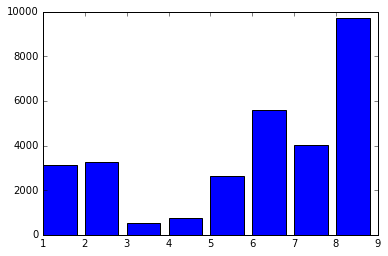

In [97]:
%matplotlib inline
import matplotlib.pyplot as plt

holder = np.bincount(predictions)
ii = np.nonzero(y)[0]
y = list(holder[1:])
X = range(1,9)
plt.bar(X, y)

In [7]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import log_loss
from sklearn import preprocessing

import numpy as np
import pandas as pd

from hyperopt import hp
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from ml_metrics import quadratic_weighted_kappa

import xgboost as xgb




DATA_TRAIN_PATH = '/Users/patrickkennedy/Desktop/Project DATA/train.csv'
DATA_TEST_PATH = '/Users/patrickkennedy/Desktop/Project DATA/test.csv'


def eval_wrapper(yhat, y):  
    y = np.array(y)
    y = y.astype(int)
    yhat = np.array(yhat)
    yhat = np.clip(np.round(yhat), np.min(y), np.max(y)).astype(int)   
    return quadratic_weighted_kappa(yhat, y)

def load_data(path_train = DATA_TRAIN_PATH, path_test = DATA_TEST_PATH):
    columns_to_drop = ['Id', 'Response']
    num_classes = 8

    train = pd.read_csv(path_train)
    test = pd.read_csv(path_test)

    # combine train and test
    all_data = train.append(test)
    all_data.fillna(-1, inplace=True)
    all_data['Product_Info_2'] = pd.factorize(all_data['Product_Info_2'])[0]
    all_data['Response'] = all_data['Response'].astype(int)

    train = all_data[all_data['Response']>0].copy()
    test = all_data[all_data['Response']<1].copy()
    train_labels = train["Response"]
    
    #train_labels = train_labels.reshape(-1,1) #need to reshape b/c one dim array
    
    train_ids = train["Id"].values
    test_ids = test["Id"].values

    return  train.drop(columns_to_drop, axis=1), \
            train_labels, \
            test.drop(columns_to_drop, axis=1),\
            train_ids, \
            test_ids
            

def write_submission(preds, output):
    sample = pd.read_csv('../data/sampleSubmission.csv')
    preds = pd.DataFrame(
        preds, index=sample.id.values, columns=sample.columns[1:])
    preds.to_csv(output, index_label='id')


def score(params):
    #change this around and try it with cross_val_score? so that i can have some cross validation?
    print "Training with params : "
    print params
    num_round = int(params['n_estimators'])
    del params['n_estimators']
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dvalid = xgb.DMatrix(X_test, label=y_test)
    # watchlist = [(dvalid, 'eval'), (dtrain, 'train')]
    model = xgb.train(params, dtrain, num_round)
    predictions = model.predict(dvalid)
    score = -eval_wrapper(predictions, y_test)
    print "\tScore {0}\n\n".format(score)
    return {'loss': score, 'status': STATUS_OK}


def optimize(trials):
    space = {
             'n_estimators' : hp.quniform('n_estimators', 100, 1000, 1),
             'eta' : hp.quniform('eta', 0.001, 0.3, 0.025),
             'max_depth' : hp.quniform('max_depth', 1, 13, 1),
             'min_child_weight' : hp.quniform('min_child_weight', 1, 100, 1),
             'subsample' : hp.quniform('subsample', 0.5, 1, 0.05),
             'gamma' : hp.quniform('gamma', 0.5, 10, 0.05),
             'colsample_bytree' : hp.quniform('colsample_bytree', 0.5, 1, 0.05),
             'objective': 'reg:linear',
             'silent' : 1
             }

    best = fmin(score, space, algo=tpe.suggest, trials=trials, max_evals=250)

    print best


X, y, _, _, _ = load_data()
print "Splitting data into train and valid ...\n\n"
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234)

#Trials object where the history of search will be stored
trials = Trials()

optimize(trials)

Splitting data into train and valid ...


Training with params : 
{'colsample_bytree': 1.0, 'silent': 1, 'min_child_weight': 23.0, 'n_estimators': 358.0, 'subsample': 0.8500000000000001, 'eta': 0.125, 'objective': 'reg:linear', 'max_depth': 8.0, 'gamma': 7.3500000000000005}
	Score -0.616892331202


Training with params : 
{'colsample_bytree': 0.8500000000000001, 'silent': 1, 'min_child_weight': 58.0, 'n_estimators': 771.0, 'subsample': 0.55, 'eta': 0.07500000000000001, 'objective': 'reg:linear', 'max_depth': 6.0, 'gamma': 4.15}
	Score -0.611208987697


Training with params : 
{'colsample_bytree': 0.75, 'silent': 1, 'min_child_weight': 63.0, 'n_estimators': 152.0, 'subsample': 0.75, 'eta': 0.225, 'objective': 'reg:linear', 'max_depth': 3.0, 'gamma': 1.75}
	Score -0.597117493065


Training with params : 
{'colsample_bytree': 0.8, 'silent': 1, 'min_child_weight': 10.0, 'n_estimators': 215.0, 'subsample': 0.55, 'eta': 0.125, 'objective': 'reg:linear', 'max_depth': 2.0, 'gamma': 7.600000000

In [10]:
import pandas as pd 
import numpy as np 
import xgboost as xgb
from scipy.optimize import fmin_powell
from ml_metrics import quadratic_weighted_kappa

def eval_wrapper(yhat, y):  
    y = np.array(y)
    y = y.astype(int)
    yhat = np.array(yhat)
    yhat = np.clip(np.round(yhat), np.min(y), np.max(y)).astype(int)   
    return quadratic_weighted_kappa(yhat, y)
    
def get_params():
    
    params = {}
    params["objective"] = "reg:linear"     
    params["eta"] = 0.038968208713327845
    params["gamma"] = 0.83745926973096763
    params["max_delta_step"] = 6.6502581223657851
    params["min_child_weight"] = 50.31287747915195
    params["subsample"] = 0.89026862324253775
    params["colsample_bytree"] = 0.86459387506389063
    params["silent"] = 1
    params["max_depth"] = 10
    params["n_estimators"] = 200
    plst = list(params.items())

    return plst
    
def apply_offset(data, bin_offset, sv, scorer=eval_wrapper):
    # data has the format of pred=0, offset_pred=1, labels=2 in the first dim
    data[1, data[0].astype(int)==sv] = data[0, data[0].astype(int)==sv] + bin_offset
    score = scorer(data[1], data[2])
    return score

# global variables
#columns_to_drop = ['Id', 'Response', 'Medical_History_10','Medical_History_24']
columns_to_drop = ['Id', 'Response']
xgb_num_rounds = 200
num_classes = 8
eta_list = [0.038968208713327845] * 150 
eta_list = eta_list + [0.01] * 35
eta_list = eta_list + [0.005] * 15

print("Load the data using pandas")

DATA_TRAIN_PATH = '/Users/patrickkennedy/Desktop/Project DATA/train.csv'
DATA_TEST_PATH = '/Users/patrickkennedy/Desktop/Project DATA/test.csv'

train = pd.read_csv(DATA_TRAIN_PATH)
test = pd.read_csv(DATA_TEST_PATH)

# combine train and test
#all_data = train.append(test)

# Found at https://www.kaggle.com/marcellonegro/prudential-life-insurance-assessment/xgb-offset0501/run/137585/code
# create any new variables    
#all_data['Product_Info_2_char'] = all_data.Product_Info_2.str[0]
#all_data['Product_Info_2_num'] = all_data.Product_Info_2.str[1]

# factorize categorical variables
#all_data['Product_Info_2'] = pd.factorize(all_data['Product_Info_2'])[0]
#all_data['Product_Info_2_char'] = pd.factorize(all_data['Product_Info_2_char'])[0]
#all_data['Product_Info_2_num'] = pd.factorize(all_data['Product_Info_2_num'])[0]

#all_data['BMI_Age'] = all_data['BMI'] * all_data['Ins_Age']

#med_keyword_columns = all_data.columns[all_data.columns.str.startswith('Medical_Keyword_')]
#all_data['Med_Keywords_Count'] = all_data[med_keyword_columns].sum(axis=1)

print('Eliminate missing values')    
# Use -1 for any others
all_data.fillna(-1, inplace=True)

# fix the dtype on the label column
all_data['Response'] = all_data['Response'].astype(int)

# split train and test
train = all_data[all_data['Response']>0].copy()
test = all_data[all_data['Response']<1].copy()

# convert data to xgb data structure
xgtrain = xgb.DMatrix(train.drop(columns_to_drop, axis=1), train['Response'].values)
xgtest = xgb.DMatrix(test.drop(columns_to_drop, axis=1), label=test['Response'].values)    

# get the parameters for xgboost
plst = get_params()
print(plst)      

# train model
model = xgb.train(plst, xgtrain, xgb_num_rounds, learning_rates=eta_list) 

# get preds
train_preds = model.predict(xgtrain, ntree_limit=model.best_iteration)
print('Train score is:', eval_wrapper(train_preds, train['Response'])) 
test_preds = model.predict(xgtest, ntree_limit=model.best_iteration)
train_preds = np.clip(train_preds, -0.99, 8.99)
test_preds = np.clip(test_preds, -0.99, 8.99)


# train offsets 
offsets = np.array([-5.1, -0.9, 0.1, -0.9, 1.0, 0.0, 0.0, 1.0])

data = np.vstack((train_preds, train_preds, train['Response']))
for j in range(num_classes):
    data[1, data[0].astype(int)==j] = data[0, data[0].astype(int)==j] + offsets[j] 
    
for j in [6,4,5,3]:
    train_offset = lambda x: -apply_offset(data, x, j)
    offsets[j] = fmin_powell(train_offset, offsets[j])  
    
# apply offsets to test
data = np.vstack((test_preds, test_preds, test['Response']))
for j in range(num_classes):
    data[1, data[0].astype(int)==j] = data[0, data[0].astype(int)==j] + offsets[j] 
final_test_preds = np.round(np.clip(data[1], 1, 8)).astype(int)

preds_out = pd.DataFrame({"Id": test['Id'].values, "Response": final_test_preds})
preds_out = preds_out.set_index('Id')
preds_out.to_csv('xgb_offset_submission_2.csv')


Load the data using pandas
Eliminate missing values


NameError: name 'all_data' is not defined

In [33]:
%%time
import pandas as pd 
import numpy as np 
import xgboost as xgb
from scipy.optimize import fmin_powell
from ml_metrics import quadratic_weighted_kappa

def eval_wrapper(yhat, y):  
    y = np.array(y)
    y = y.astype(int)
    yhat = np.array(yhat)
    yhat = np.clip(np.round(yhat), np.min(y), np.max(y)).astype(int)   
    return quadratic_weighted_kappa(yhat, y)
    
def get_params():
    
    params = {}
    params["objective"] = "reg:linear"     
    params["eta"] = 0.027414206118598777
    params["gamma"] = 0.88553320765501153
    params["max_delta_step"] = 2.0801102305073238
    params["min_child_weight"] = 87.4497497328569295
    params["subsample"] = 0.16906773086480992
    params["colsample_bytree"] = 0.53194584264551403
    params["silent"] = 1
    params["max_depth"] = 9
    #params["n_estimators"] = 829.49940166736644
    plst = list(params.items())

    return plst
    
def apply_offset(data, bin_offset, sv, scorer=eval_wrapper):
    # data has the format of pred=0, offset_pred=1, labels=2 in the first dim
    data[1, data[0].astype(int)==sv] = data[0, data[0].astype(int)==sv] + bin_offset
    score = scorer(data[1], data[2])
    return score

# global variables
#columns_to_drop = ['Id', 'Response', 'Medical_History_10','Medical_History_24']
columns_to_drop = ['Id', 'Response']
xgb_num_rounds = 500
num_classes = 8
eta_list = [0.027414206118598777] * 250 
eta_list = eta_list + [0.01] * 150
eta_list = eta_list + [0.005] * 50

print("Load the data using pandas")

DATA_TRAIN_PATH = '/Users/patrickkennedy/Desktop/Project DATA/train.csv'
DATA_TEST_PATH = '/Users/patrickkennedy/Desktop/Project DATA/test.csv'

train = pd.read_csv(DATA_TRAIN_PATH)
#test = pd.read_csv(DATA_TEST_PATH)

# combine train and test
#all_data = train.append(test)

# Found at https://www.kaggle.com/marcellonegro/prudential-life-insurance-assessment/xgb-offset0501/run/137585/code
# create any new variables    
train['Product_Info_2_char'] = train.Product_Info_2.str[0]
train['Product_Info_2_num'] = train.Product_Info_2.str[1]

# factorize categorical variables
train['Product_Info_2'] = pd.factorize(train['Product_Info_2'])[0]
train['Product_Info_2_char'] = pd.factorize(train['Product_Info_2_char'])[0]
train['Product_Info_2_num'] = pd.factorize(train['Product_Info_2_num'])[0]

train['BMI_Age'] = train['BMI'] * train['Ins_Age']

med_keyword_columns = train.columns[train.columns.str.startswith('Medical_Keyword_')]
train['Med_Keywords_Count'] = train[med_keyword_columns].sum(axis=1)

print('Eliminate missing values')    
# Use -1 for any others
train.fillna(-1000, inplace=True)

# fix the dtype on the label column
train['Response'] = train['Response'].astype(int)

# split train and test
#train = all_data[all_data['Response']>0].copy()
#test = all_data[all_data['Response']<1].copy()

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop(columns_to_drop, axis=1), train['Response'].values)
xgtrain = xgb.DMatrix(X_train, y_train)
xgtest = xgb.DMatrix(X_test, label=y_test)
  

# get the parameters for xgboost
plst = get_params()
print(plst)      

# train model
model = xgb.train(plst, xgtrain, xgb_num_rounds, learning_rates=eta_list) 

# get preds
train_preds = model.predict(xgtrain, ntree_limit=model.best_iteration)
print('Train score is:', eval_wrapper(train_preds, y_train)) 
test_preds = model.predict(xgtest, ntree_limit=model.best_iteration)
train_preds = np.clip(train_preds, -0.99, 8.99)
test_preds = np.clip(test_preds, -0.99, 8.99)


# train offsets 
offsets = np.array([-5.1, -0.9, 0.1, -0.9, 1.0, 0.0, 0.0, 1.0])

data = np.vstack((train_preds, train_preds, y_train))
for j in range(num_classes):
    data[1, data[0].astype(int)==j] = data[0, data[0].astype(int)==j] + offsets[j] 
    
for j in [6,4,5,3]:
    train_offset = lambda x: -apply_offset(data, x, j)
    offsets[j] = fmin_powell(train_offset, offsets[j])  
    
# apply offsets to test
data = np.vstack((test_preds, test_preds, y_test))
for j in range(num_classes):
    data[1, data[0].astype(int)==j] = data[0, data[0].astype(int)==j] + offsets[j] 
final_test_preds = np.round(np.clip(data[1], 1, 8)).astype(int)


print quadratic_weighted_kappa(final_test_preds, y_test)
#preds_out = pd.DataFrame({"Id": test['Id'].values, "Response": final_test_preds})
#preds_out = preds_out.set_index('Id')
#preds_out.to_csv('xgb_offset_submission_2.csv')


Load the data using pandas
Eliminate missing values
[('colsample_bytree', 0.531945842645514), ('silent', 1), ('max_delta_step', 2.080110230507324), ('min_child_weight', 87.44974973285693), ('subsample', 0.16906773086480992), ('eta', 0.027414206118598777), ('objective', 'reg:linear'), ('max_depth', 9), ('gamma', 0.8855332076550115)]
('Train score is:', 0.6228827530695871)
Optimization terminated successfully.
         Current function value: -0.636977
         Iterations: 2
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: -0.668411
         Iterations: 2
         Function evaluations: 48
Optimization terminated successfully.
         Current function value: -0.668755
         Iterations: 2
         Function evaluations: 34
Optimization terminated successfully.
         Current function value: -0.669661
         Iterations: 2
         Function evaluations: 55
0.637890174596
CPU times: user 1min 7s, sys: 320 ms, total: 1min 7s
Wall t